# Investigation of Methane Activation over NiO/CZ using in-situ FTIR Spectroscopy

# Import Packages and Pre-Defined Functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lmfit import minimize, Parameters, report_fit, Minimizer
import time
from sklearn.metrics import r2_score
from ipynb.fs.full.functions import get_first_nbr_from_str, baseline_als, Data_import

In [2]:
from ipynb.fs.full.functions import Voigt, Gaussian
from ipynb.fs.full.functions import Generate_data, Generate_params, loss_func, Plot_data, Plot_com_data, Print_var
from ipynb.fs.full.functions import Generate_Vec_IG, Generate_data_IG, loss_func_IG, Generate_params_IG, Plot_data_IG

# Import Data

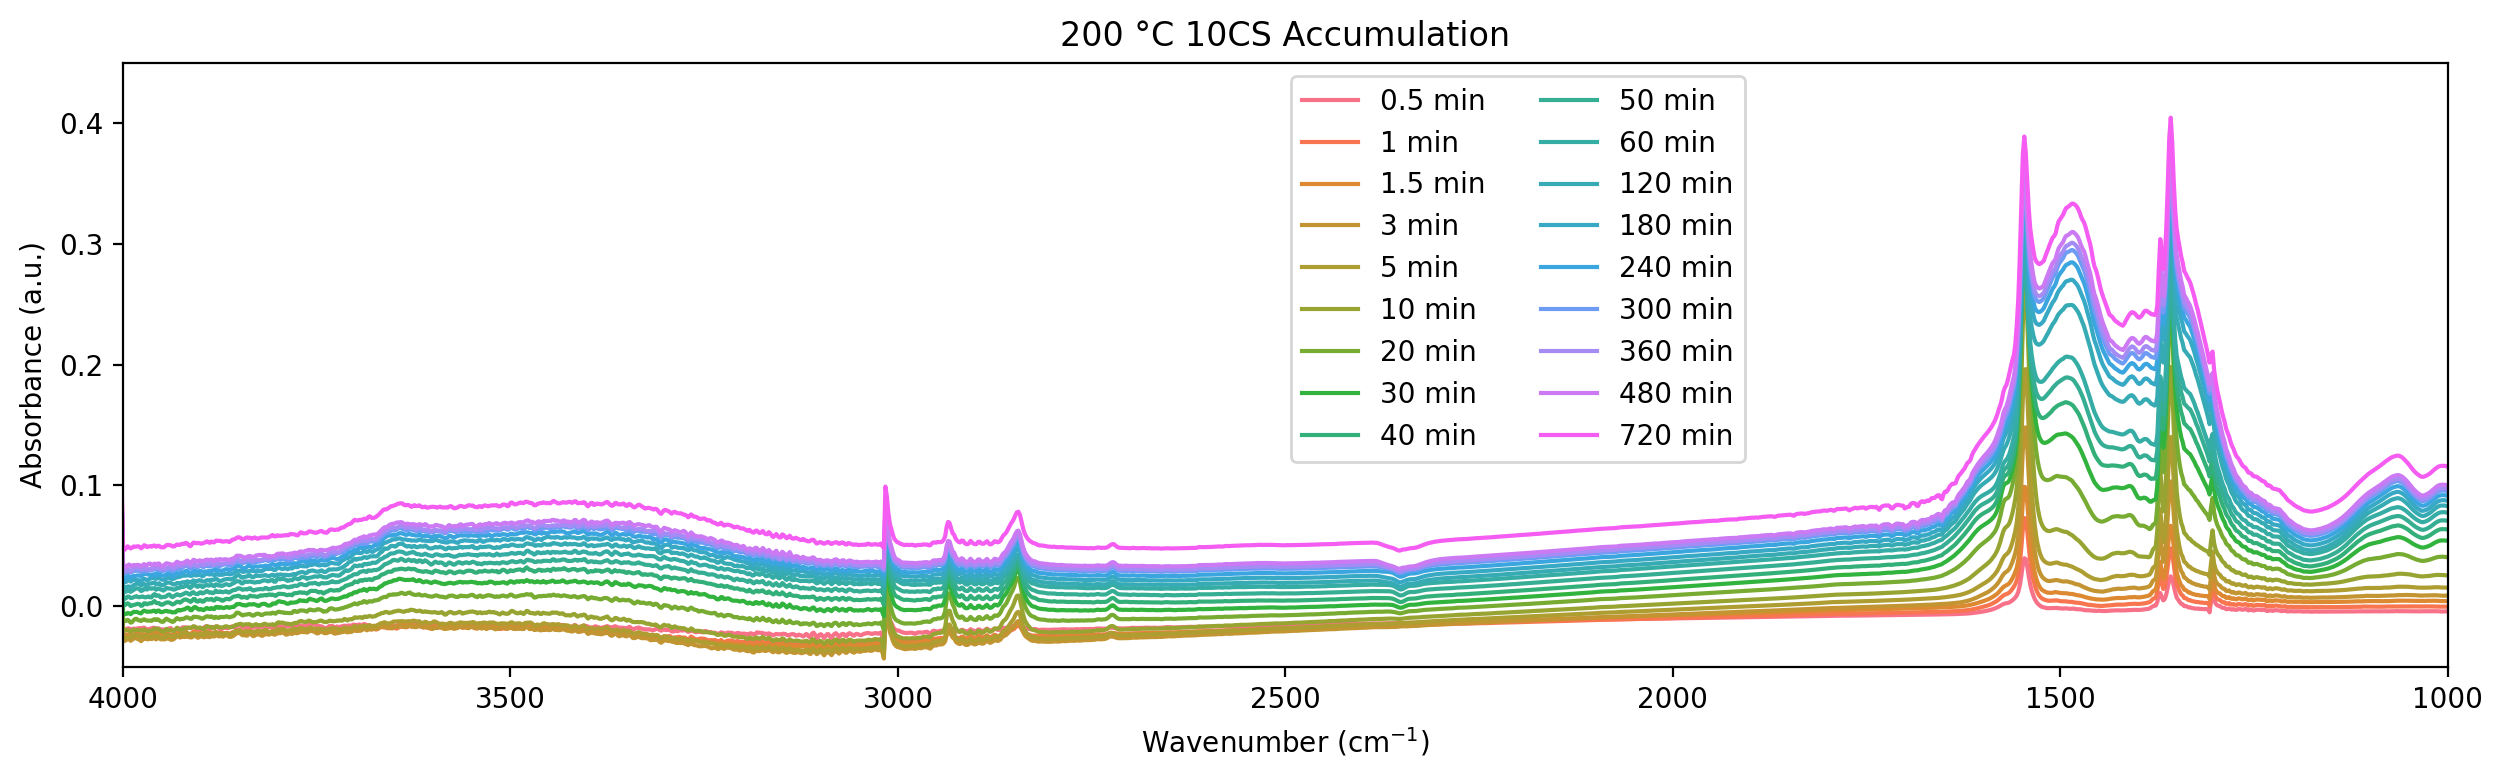

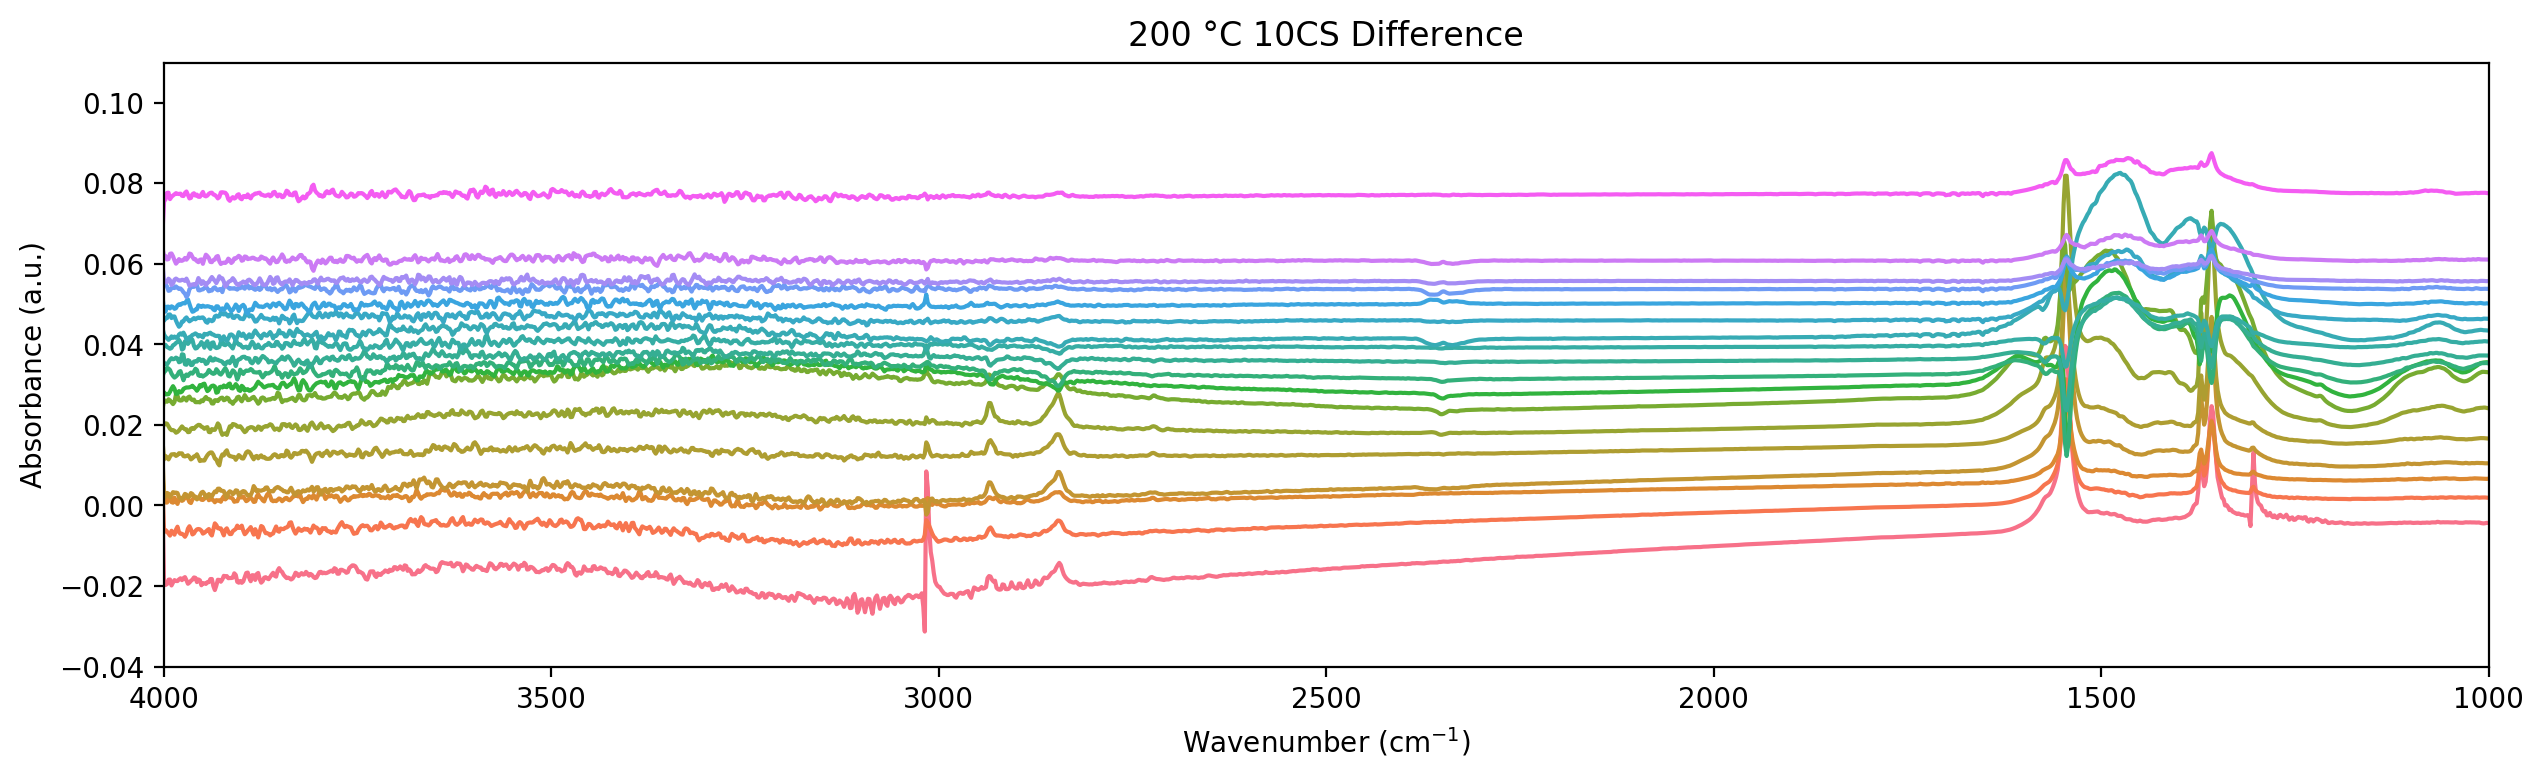

In [3]:
result = Data_import('data/20201107.xlsx', 200, '10CS', 1.15,
                     ylims = np.array([[-0.05,0.45],[-0.04,0.11]]), 
                     Incre=np.array([0.006,0.004]))
df = result['Data']
dif = result['Dif']
acu = result['Acu']
Time = result['Time']

## Process Data by Region

30.0
40.0
50.0
60.0
120.0
The fitted region started at 2819.463 cm-1, and ended at 2971.814 cm-1.


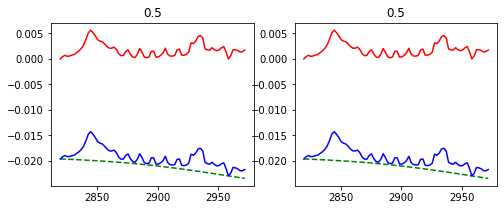

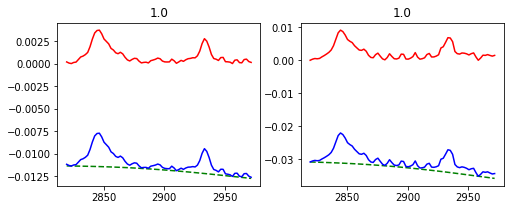

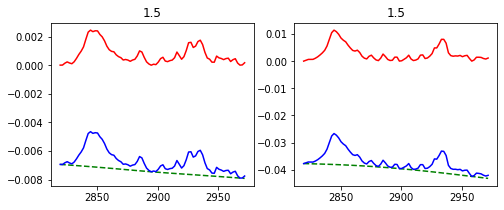

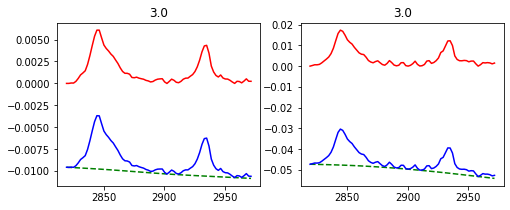

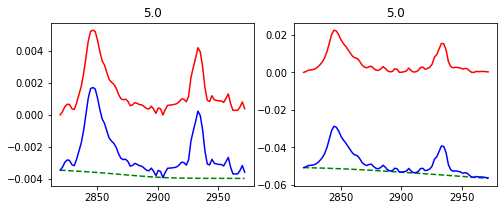

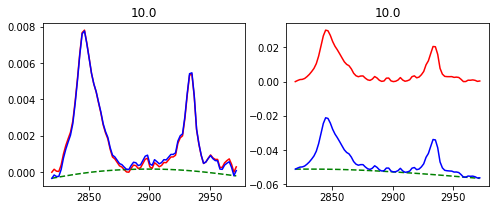

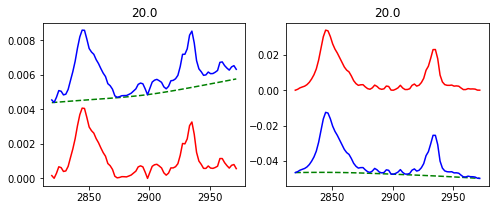

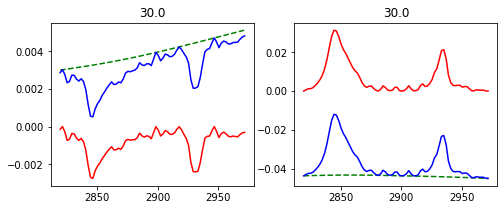

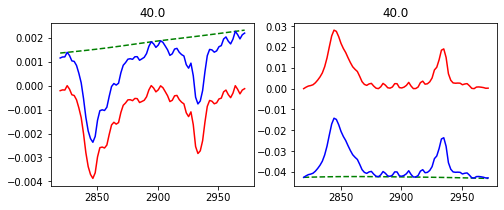

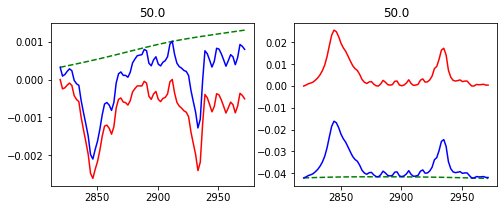

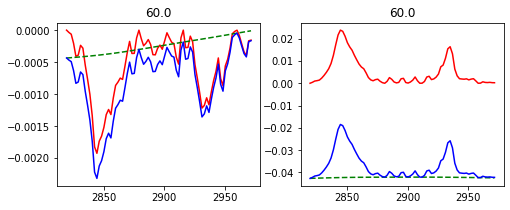

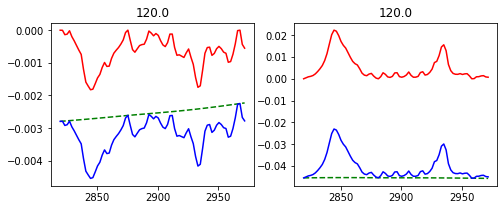

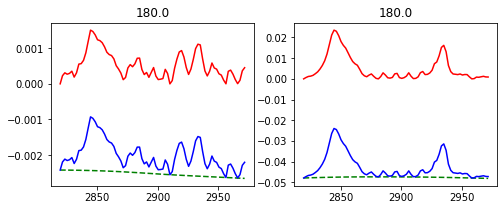

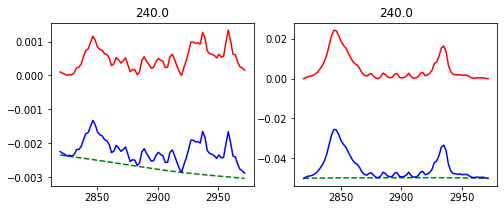

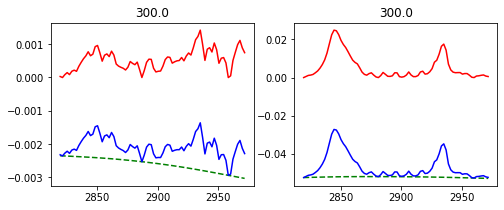

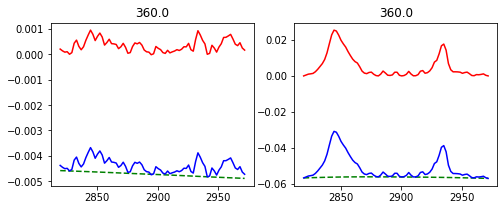

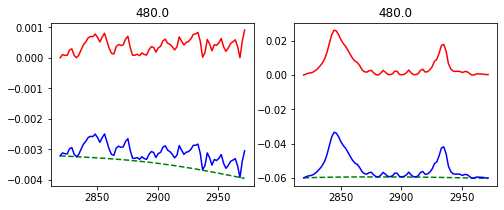

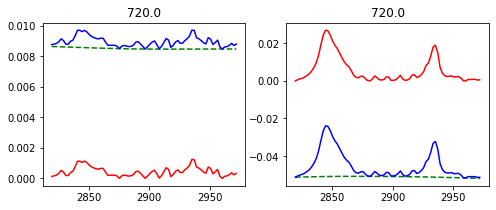

In [4]:
column_num_new = np.shape(dif)[1]
SCH = 1255     #start index of CH 
ECH = 1335     #end index of CH
a = np.transpose(acu[[dif.columns[0]]][SCH:ECH].to_numpy())
WN = a[0]
CH_acu = []
CH_dif = []

for i in range(1,column_num_new):
    a = np.transpose(dif[[dif.columns[i]]][SCH:ECH].to_numpy())
    a = a[0]
    ##baseline correction
    if a[23] < a[0]:
        print(get_first_nbr_from_str(dif.columns[i]))
        b = -a
        bsl = baseline_als(b, 105, 0.0001)
        y = -(b - bsl)
        bsl = -bsl
    else:
        bsl = baseline_als(a, 105, 0.0001)
        y = a - bsl
    a_acu = np.transpose(acu[[dif.columns[i]]][SCH:ECH].to_numpy())[0]
    bsl_acu = baseline_als(a_acu, 105, 0.0001)
    y_acu = a_acu-bsl_acu
    CH_dif.append(y)
    CH_acu.append(y_acu)
    fig,ax = plt.subplots(1,2,figsize=(8,3))
    ax[0].plot(WN,y,'r')
    ax[0].plot(WN,bsl,'g--')
    ax[0].plot(WN,a,'b')
    ax[0].set_title(Time[i-1])
    ax[1].plot(WN,y_acu,'r')
    ax[1].plot(WN,bsl_acu,'g--')
    ax[1].plot(WN,a_acu,'b')
    ax[1].set_title(Time[i-1]) 
print('The fitted region started at {0} cm-1, and ended at {1} cm-1.'.format(WN[0], WN[-1]))
x_CH = np.array(WN)
y_CH = np.array(CH_acu)

In [5]:
column_num_new = np.shape(dif)[1]
S = 455
E = 675
b = np.transpose(dif[[dif.columns[0]]][S:E].to_numpy())
WN = b[0]
CC = []
CC_acu = []
for i in range(1,column_num_new):
    a = np.transpose(dif[[dif.columns[i]]][S:E].to_numpy())
    b = np.transpose(acu[[dif.columns[i]]][S:E].to_numpy())
    CC.append(a[0])
    CC_acu.append(b[0])
x_CC = np.array(WN)
y_CC = np.array(CC)

print('The fitted region started at {0} cm-1, and ended at {1} cm-1.'.format(WN[0], WN[-1]))

The fitted region started at 1276.665 cm-1, and ended at 1699.006 cm-1.


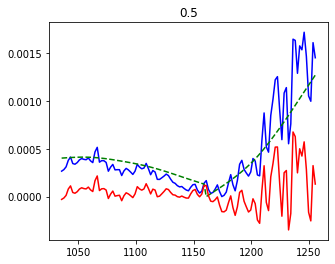

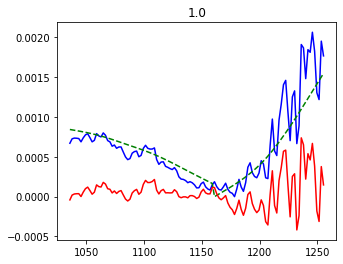

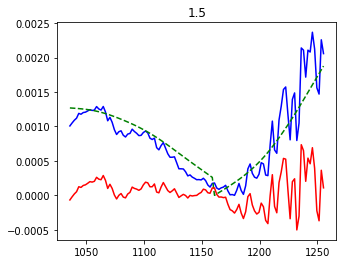

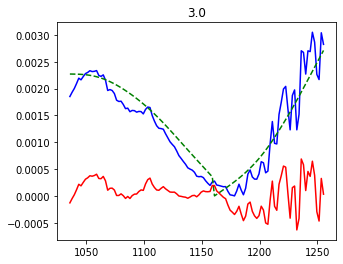

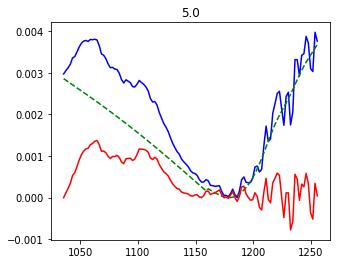

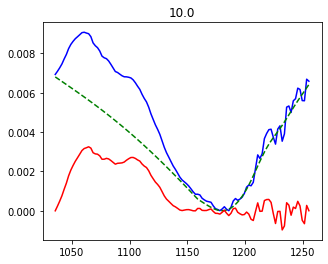

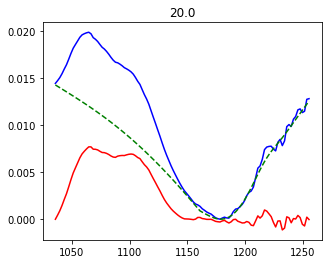

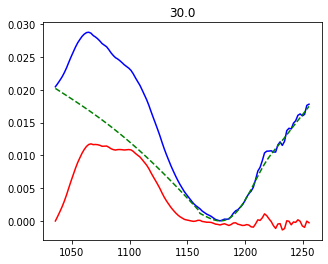

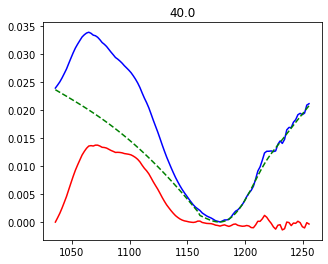

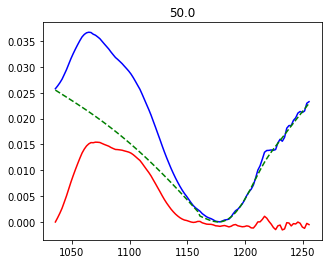

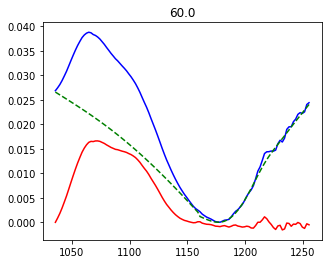

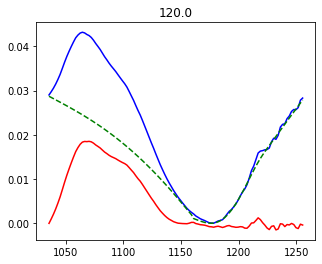

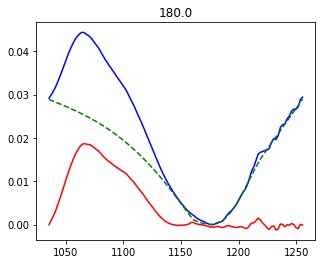

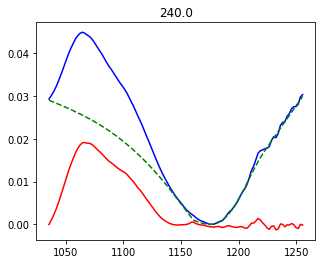

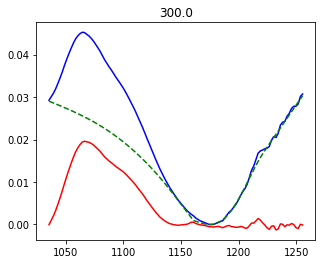

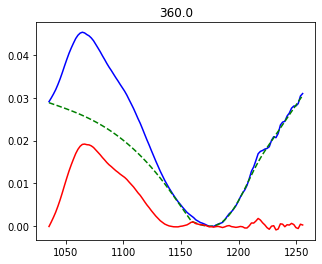

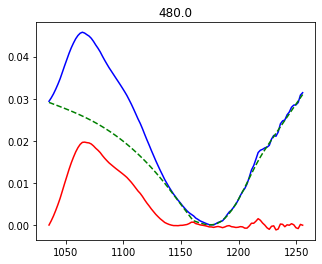

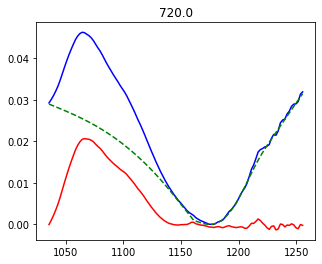

In [6]:
column_num_new = np.shape(dif)[1]
SCO = 330
ECO = 445
LCO = ECO-SCO
b = np.transpose(dif[[dif.columns[0]]][SCO:ECO].to_numpy())
WN = b[0]
CO = []
Min_ind = 65
for i in range(1,column_num_new):
    a = np.transpose(acu[[dif.columns[i]]][SCO:ECO].to_numpy())
    a1 = a[0][:Min_ind]
    a2 = a[0][Min_ind:]
    if i < 5:
        bsl1 = baseline_als(a1, 1005, 0.05)
        bsl2 = baseline_als(a2, 1005, 0.05)
    else: 
        bsl1 = baseline_als(a1, 85,0.00005)
        bsl2 = baseline_als(a2, 105, 0.5)
    y1 = a1 - bsl1
    y2 = a2 - bsl2
    DIF = y1[-1] - y2[0]
    y2 = y2 + DIF
    y = np.concatenate((y1,y2))
    bsl = np.concatenate((bsl1,bsl2))

    CO.append(y)
    fig = plt.figure(figsize=(5,4))
    plt.plot(WN,a[0]-a[0].min(),'b-')
    plt.plot(WN,bsl-bsl.min(),'g--')
    plt.plot(WN,CO[-1],'r-')
    plt.title(Time[i-1])

x_CO = np.array(WN)
y_CO = np.array(CO)

# Data Analysis using the Algorithm
## Fitting the C-H Stretching

In [ ]:
Vec_IG = {'Mus':np.array([2847.1,2861.9,2933.8,2951.8]),
          'Sigmas':np.array([4.0,2.6,2.7,1.8]),
          'Types':np.array([1,1,1,1]),
          'Fixed':None,
          'Lims':None}


In [97]:
t0 = time.time()
fit_params_IG = Generate_params_IG(x_CH,Vec_IG,ndata =18)

fitter = Minimizer(loss_func_IG, fit_params_IG, fcn_args=(x_CH, y_CH, Vec_IG))
result = fitter.minimize(method='leastsq')
t1 = time.time() 

print('The time cost is:',t1-t0)

The time cost is: 741.0804920196533


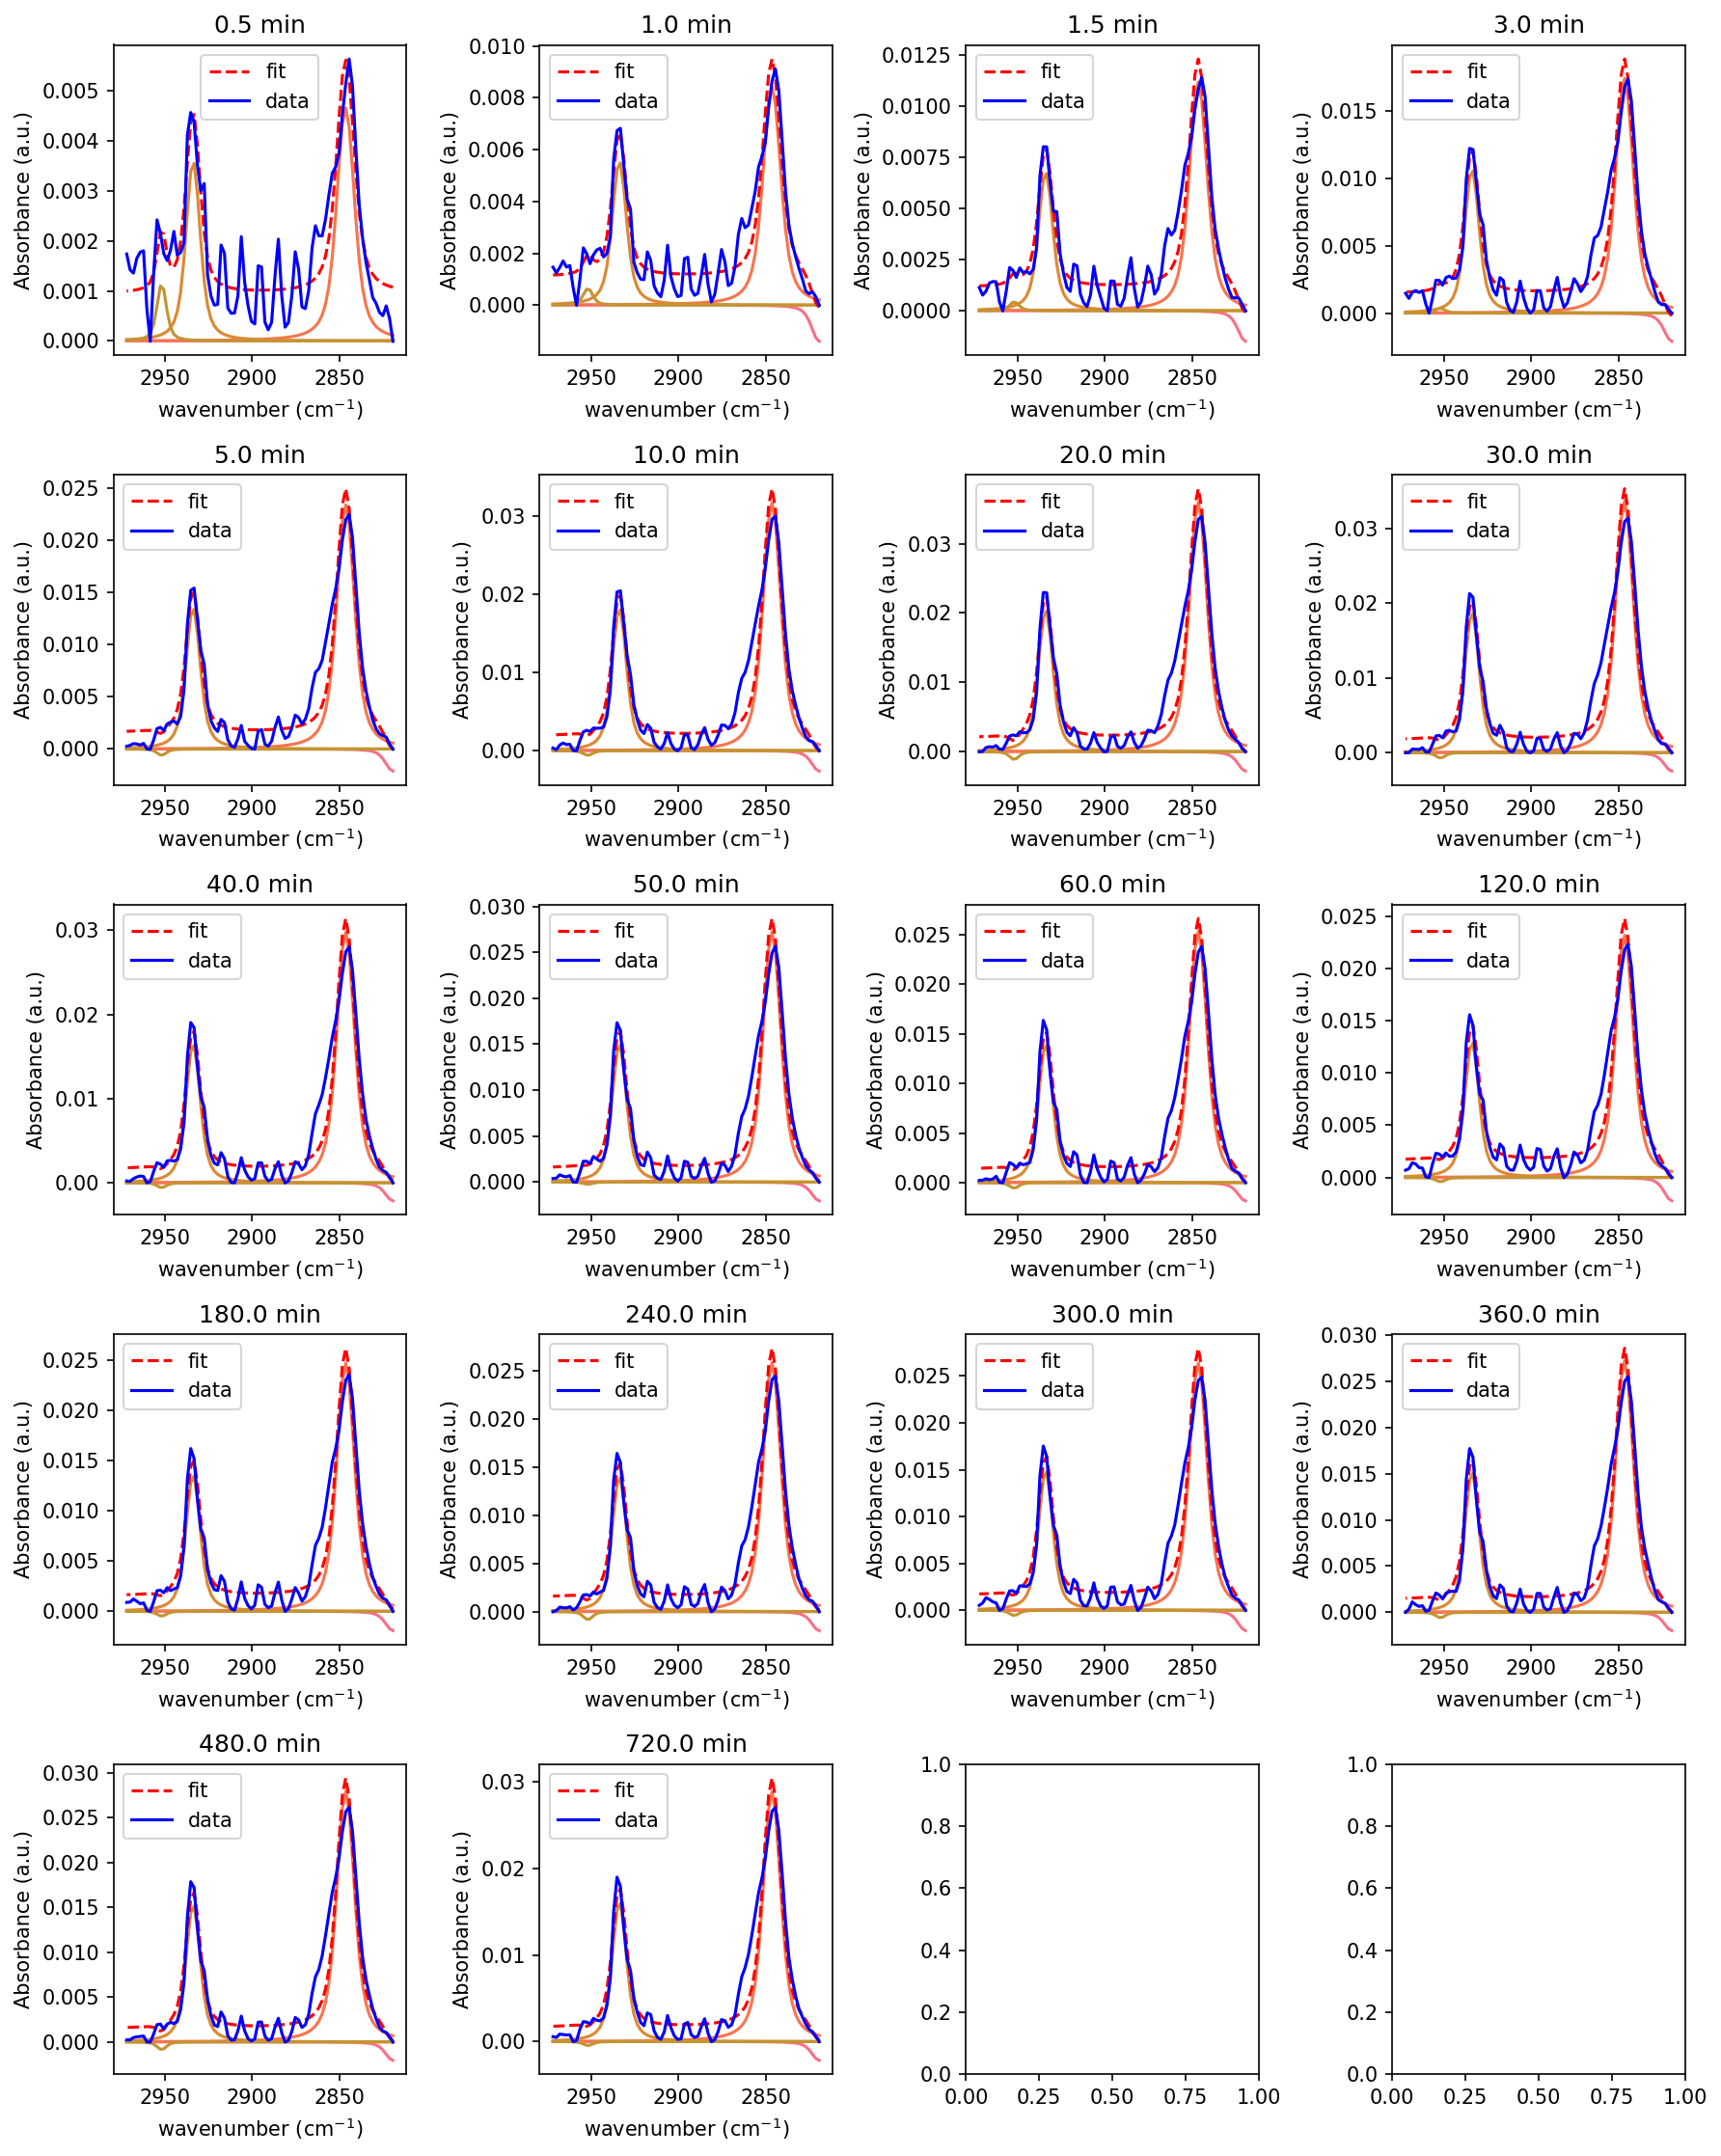

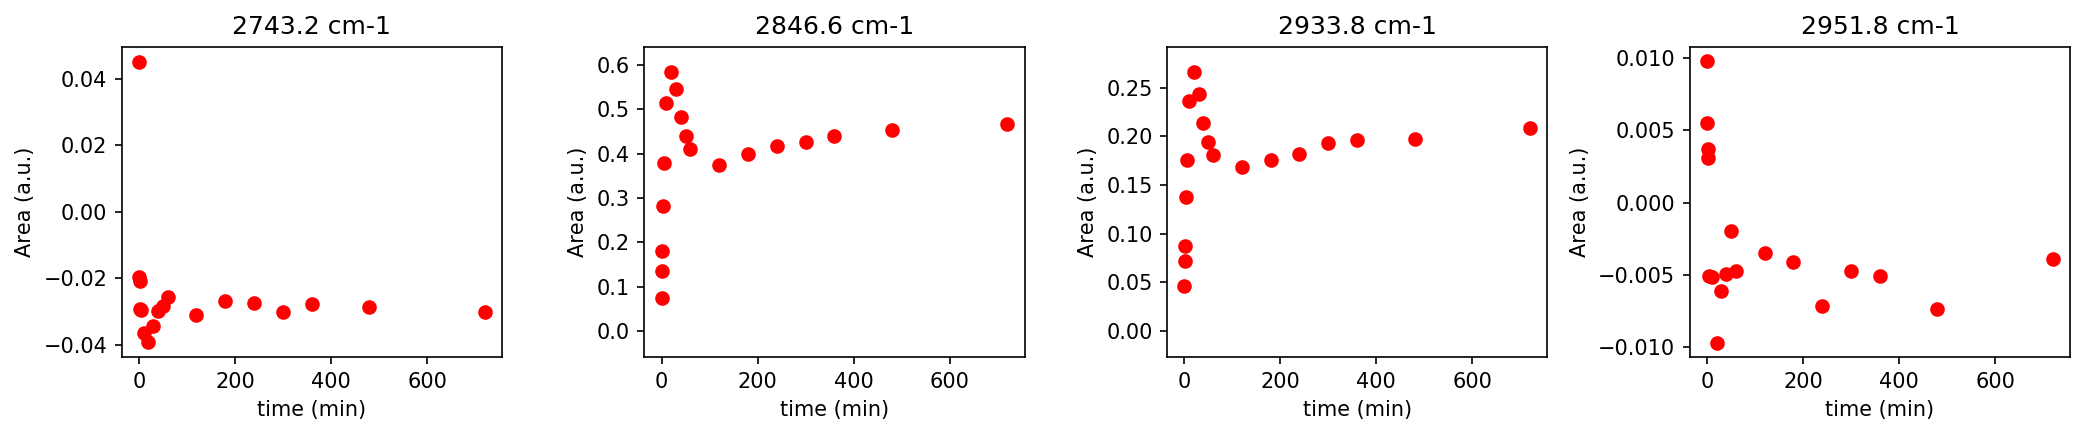

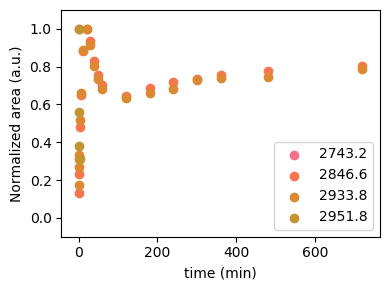

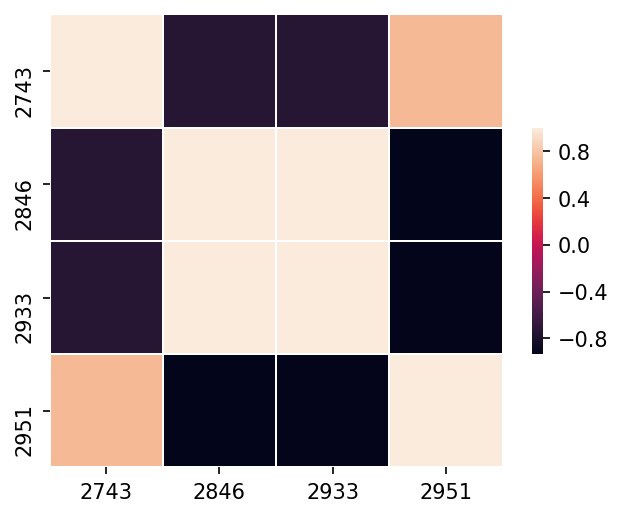

{'Peak Pos': [2743, 2846, 2933, 2951],
 'Amps': array([[ 0.04523404,  0.07540463,  0.0464527 ,  0.00984513],
        [-0.01956065,  0.13634147,  0.07177661,  0.00553225],
        [-0.02090042,  0.18100451,  0.08771629,  0.00372513],
        [-0.02923158,  0.28173416,  0.13785799,  0.00306402],
        [-0.0295617 ,  0.37942909,  0.17550694, -0.00512826],
        [-0.03659331,  0.51373106,  0.23567031, -0.00516425],
        [-0.03924181,  0.5829371 ,  0.26551749, -0.0097467 ],
        [-0.03446965,  0.54527216,  0.24324741, -0.00614043],
        [-0.02996853,  0.48253289,  0.21351828, -0.00495476],
        [-0.02847784,  0.44045255,  0.19452806, -0.0019888 ],
        [-0.02565523,  0.41046702,  0.18073144, -0.00474488],
        [-0.03117607,  0.37508866,  0.16802121, -0.00352213],
        [-0.02681595,  0.3990862 ,  0.17573805, -0.00411751],
        [-0.02750621,  0.41824099,  0.18148041, -0.00717444],
        [-0.03020989,  0.42694992,  0.19299936, -0.00478925],
        [-0.0276856 ,  

In [98]:
params_IG = result.params
Plot_data_IG(params_IG,x_CH,y_CH,Vec_IG,Time,False)

In [99]:
Vec_IG_struc = {'Peaks':[[0,1],
                        [2,3]], #Index of peaks that are from the same species
                'Types':[[1,1],
                        [1,1]]} #Peak type of each peak in this vector

Vec_fit = Generate_Vec_IG(params_IG,Vec_IG_struc,18)
Vec_fit['Alphas'] = None
Vec_fit['Vec0']['Mus'][0] = 2845.1
Vec_fit['Vec0']['Mus'][1] = 2933.1
Vec_fit['Vec1']['Mus'][0] = 2863.1
Vec_fit['Vec1']['Mus'][1] = 2953.1

Vec_fit['Vec0']['Lims'] = {'Peaks':np.array([0,1]),
                           'Specs':np.array([[2840,2900],
                                            [2980,2980],
                                            [1.0,1.0],
                                            [6.5,6.5],
                                            [0.0001,0.0001]]),
                           'Pos': None}
Vec_fit['Vec1']['Lims'] = {'Peaks':np.array([0,1]),
                           'Specs':np.array([[2800,2900],
                                            [2980,2990],
                                            [1.0,1.0],
                                            [6.5,6.5],
                                            [0.00001,0.00001]]),
                           'Pos': None}


In [100]:
t0 = time.time()
fit_params = Generate_params(x_CH,Vec_fit,ndata = 18)

fitter = Minimizer(loss_func, fit_params, fcn_args=(x_CH, y_CH, Vec_fit))
result = fitter.minimize(method='leastsq')
t1 = time.time()

print('The time cost is:',t1-t0)

0 2.9139203644909992 1.0 6.5
0 2845.1 2840.0 2875.1
0 3.3799999999999244 1.0 6.5
0 2933.1 2903.1 2963.1
1 2.7 1.0 6.5
1 2863.1 2833.1 2893.1
1 1.8 1.0 6.5
1 2953.1 2923.1 2983.1
The time cost is: 16.559664964675903


In [101]:
new_params = result.params
yhat_CH = Generate_data(new_params,x_CH,Vec_fit,ndata=18)
print('The R2 score of the fit is: {:.2f}'.format( r2_score(y_CH.flatten(), yhat_CH.flatten())))

The R2 score of the fit is: 0.97


Plotting.....


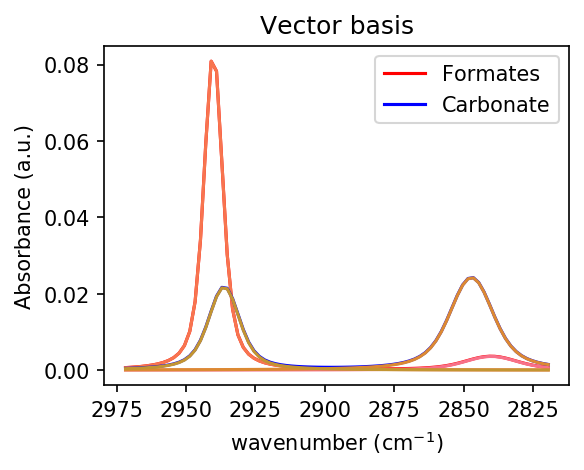

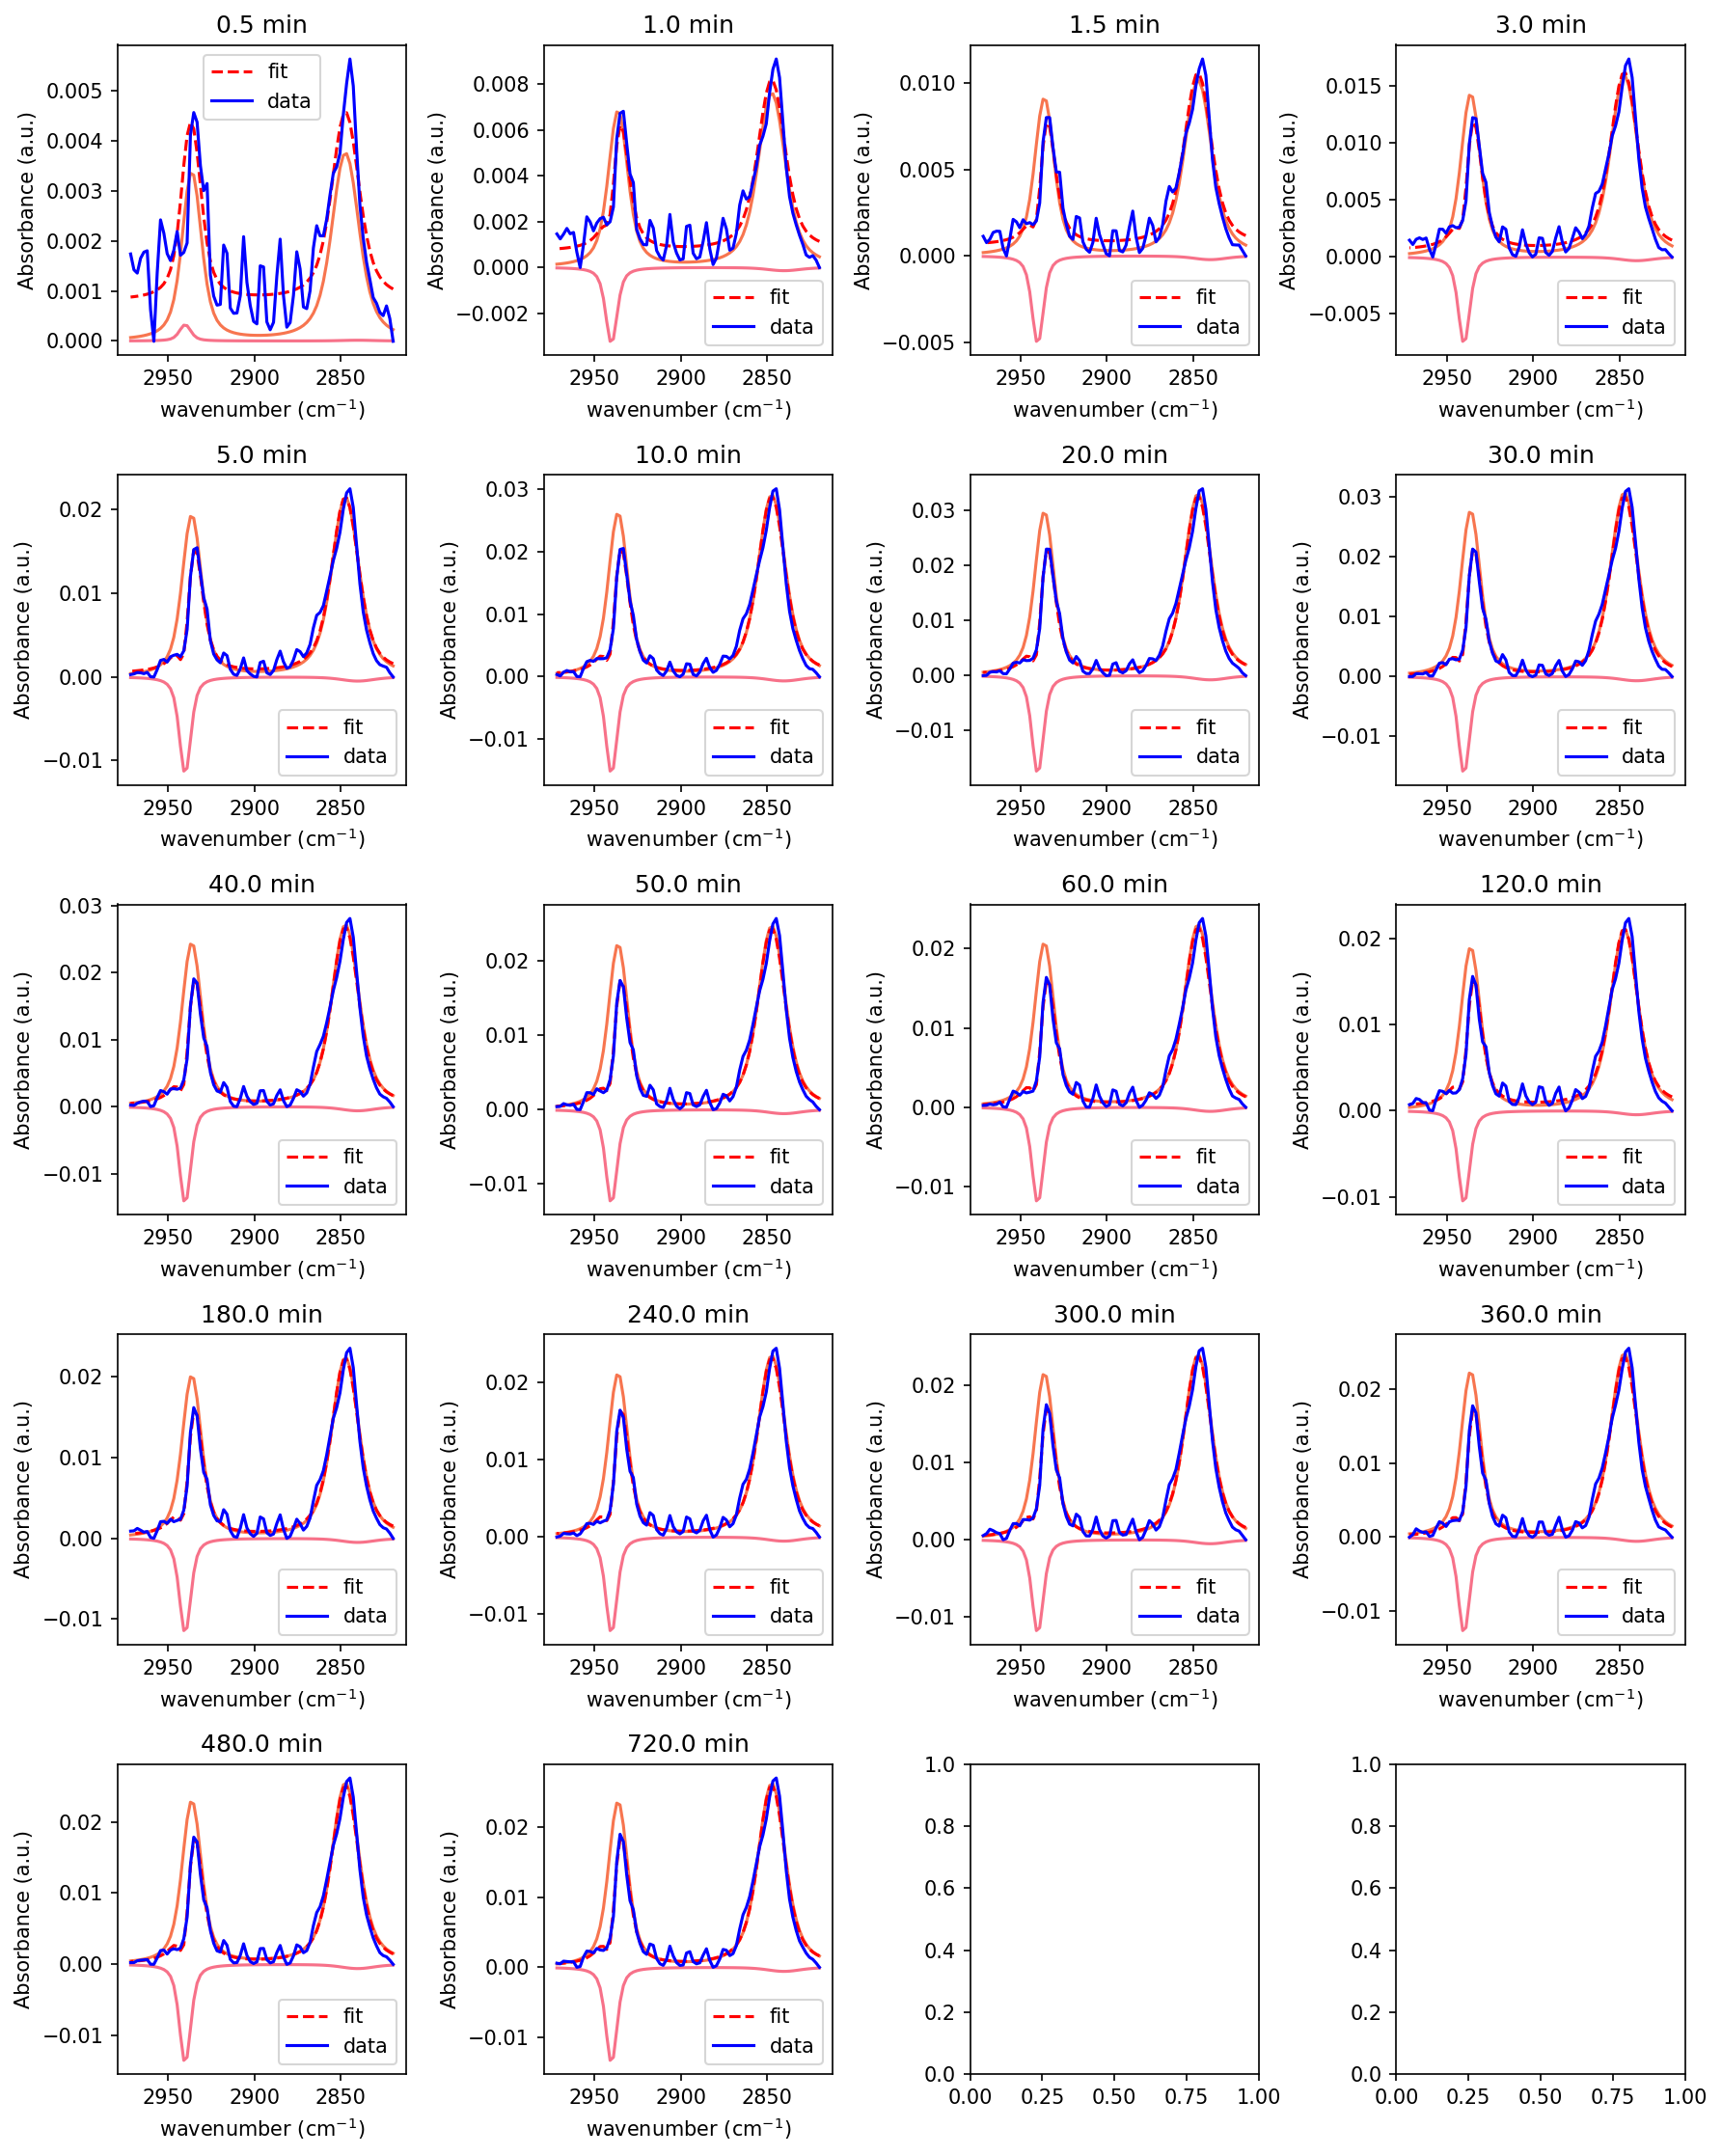

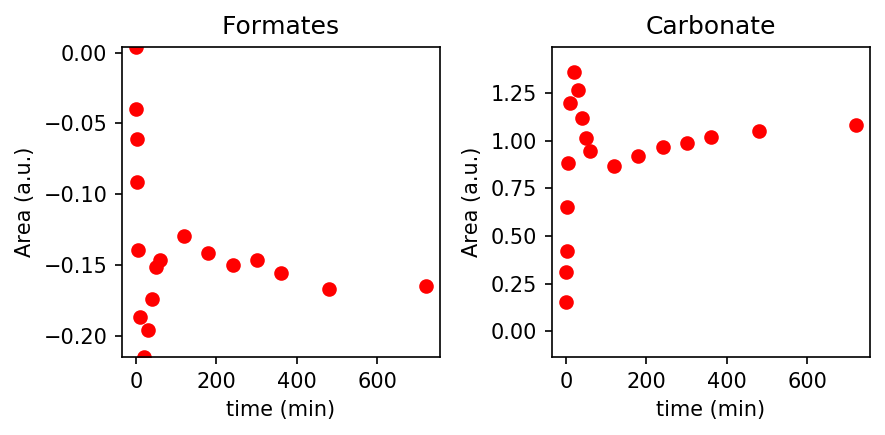

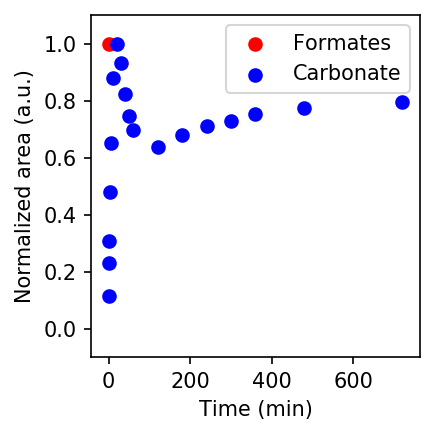

In [102]:
Vec_name=np.array(['Formates','Carbonate'])
Plot_data(new_params,x_CH,y_CH,Vec_fit,Time,Vec_name,False)

In [103]:
Print_var(new_params,Vec_name,Vec_IG_struc)

Species		Type		Peak (cm-1)	Variance (cm-1)	
Formates	Voigt		2840.0		6.5
		Voigt		2940.2		2.2
Carbonate	Voigt		2847.1		5.3
		Voigt		2936.3		3.7


## Fitting the 1300-1700 cm$^{-1}$ Region

### Fitting the initial stage (0,10) min

In [64]:
Vec_IG_CC0 = {'Mus':np.array([1580.5,1544.5,1548.3,1488.25,1424.5, 1349.9,1371.1,1357.8,1304]),
             'Sigmas':np.array([10,3.624,17.8,13.4,17.9, 22.9,1.764,4.375,2]),
             'Types':np.array([1,0,1,1,1,1,0,0,0]),
             'Fixed':None,#np.array([0,0,0,0,0,0,0,1,1,1]),
             'Lims':{'Positive':True,
                     'Mus_min':np.array([1590,1537., 1500., 1460, 1370,1330, 1300, 1330, 1300.]),
                    'Mus_max':None}             
             }


In [66]:
t0 = time.time()
ndata = 6
fit_params_IG = Generate_params_IG(x_CC,Vec_IG_CC0,ndata = ndata)
fitter = Minimizer(loss_func_IG, fit_params_IG, fcn_args=(x_CC, y_CC[:ndata], Vec_IG_CC0))
result = fitter.minimize(method='leastsq')
t1 = time.time() 

print('The time cost is:',t1-t0)


The time cost is: 680.6345431804657


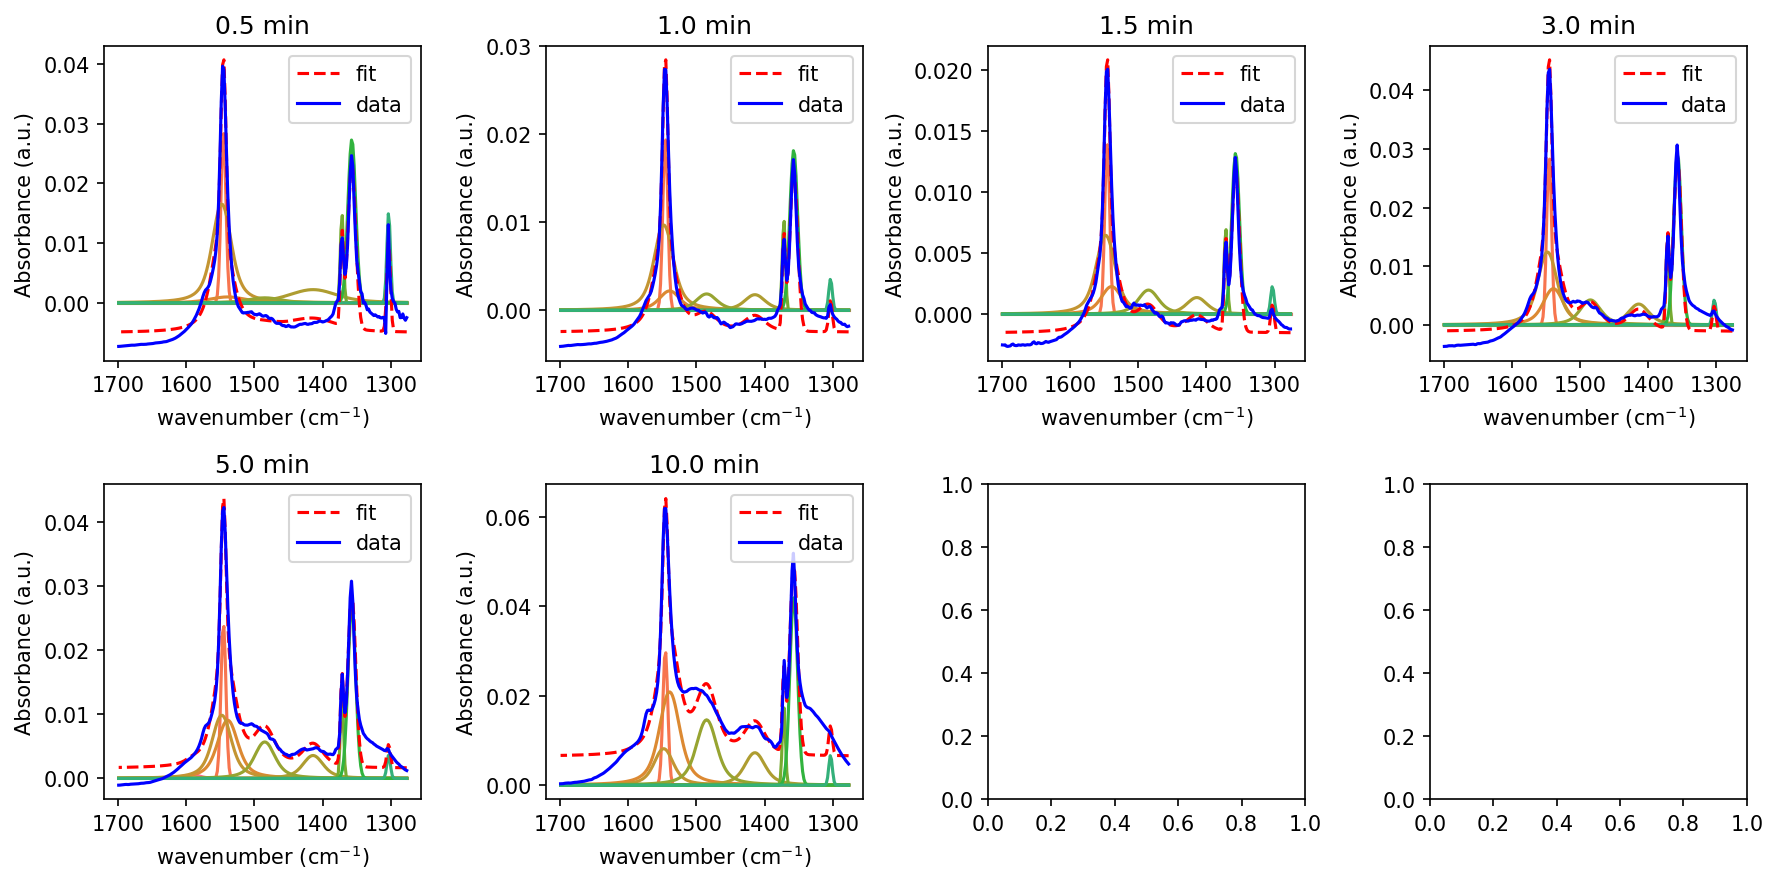

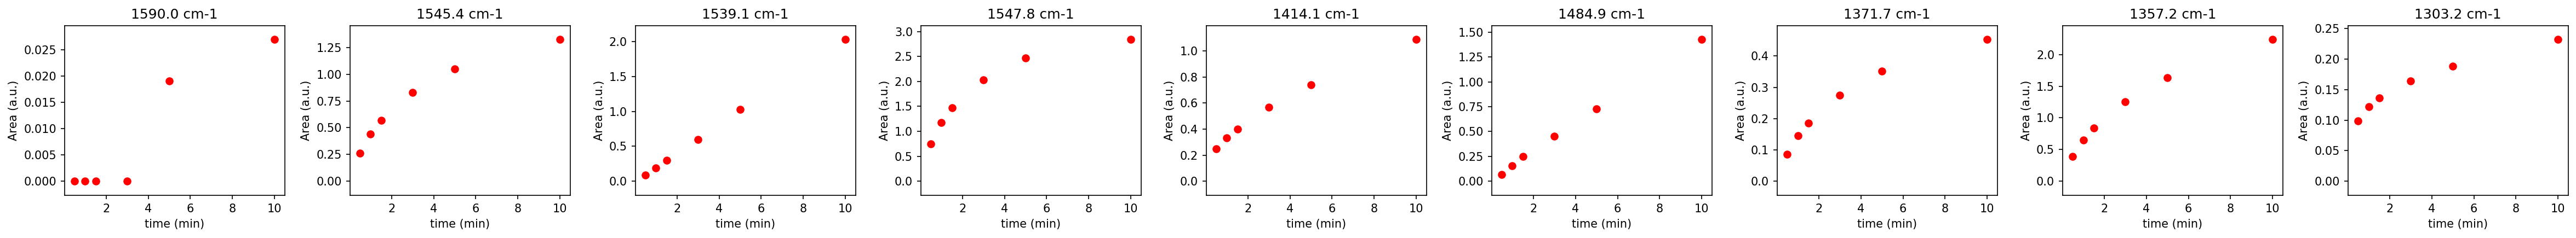

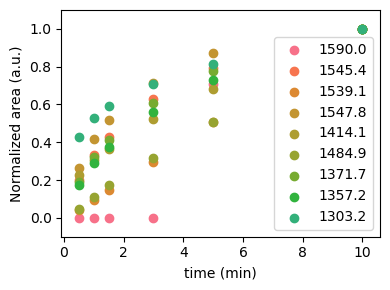

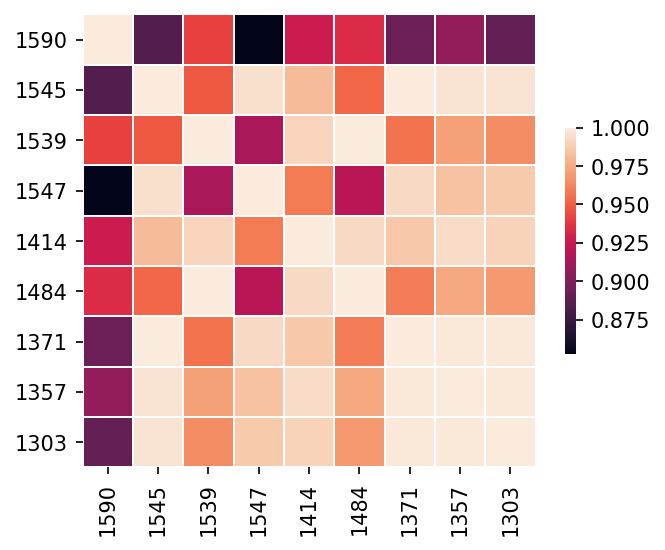

{'Peak Pos': [1590, 1545, 1539, 1547, 1414, 1484, 1371, 1357, 1303],
 'Amps': array([[3.33066907e-16, 2.62074224e-01, 8.59644143e-02, 7.43453151e-01,
         2.48601719e-01, 6.59763437e-02, 8.60399837e-02, 3.90306688e-01,
         9.87827045e-02],
        [7.88792235e-07, 4.40694512e-01, 1.91278573e-01, 1.17866520e+00,
         3.33336407e-01, 1.54810354e-01, 1.45340976e-01, 6.49414486e-01,
         1.21955064e-01],
        [7.88792235e-07, 5.68771447e-01, 2.99341882e-01, 1.46870899e+00,
         3.98323148e-01, 2.49181605e-01, 1.85968087e-01, 8.37267676e-01,
         1.36773961e-01],
        [7.88792235e-07, 8.30016360e-01, 5.95293386e-01, 2.02734287e+00,
         5.68337367e-01, 4.53015419e-01, 2.74103078e-01, 1.25320832e+00,
         1.64569209e-01],
        [1.90736141e-02, 1.04950418e+00, 1.03147530e+00, 2.47155363e+00,
         7.40141152e-01, 7.26209295e-01, 3.50698218e-01, 1.63594674e+00,
         1.88302420e-01],
        [2.68968587e-02, 1.32333150e+00, 2.03147530e+00, 2.8385

In [67]:
params_IG = result.params
Plot_data_IG(params_IG,x_CC,y_CC[:ndata],Vec_IG_CC0,Time[:ndata],True)

Now we want to creat a frame of the vector space, i.e. we need to define how many vectors are there and which peaks belong to which vector.

In [68]:
Vec_IG_CC0 = {'Peaks':np.array([[0],[1,2],[3,4,5],[6,7],[8]]),
              'Types':np.array([[1],[0,1],[1,1,1],[0,0],[0]])}
Vec_fit_CC0 = Generate_Vec_IG(params_IG,Vec_IG_CC0,ndata)
#Vec_fit['Vec0']['Lims'] = {'Peaks':np.array([0,1,2,3]),
#                           'Specs':np.array([[0.1,0.1,0.1,0.1],
#                                            [4000,4000,4000,4000],
#                                            [0.1,.1,0.1,0.1],
#                                            [6.5,6.5,6.5,6.5]])}


In [69]:
t0 = time.time()
Vec_fit_CC0['Alphas'] = None
Vec_fit_CC0['Vec0']['Lims'] = {'Peaks':np.array([0]),
                               'Specs':np.array([[1570],[1605],[0.1],[20],[0]]),
                               'Pos':[True]}
Vec_fit_CC0['Vec1']['Mus'][1] = 1540.
Vec_fit_CC0['Vec1']['Lims'] = {'Peaks':np.array([0,1]),
                               'Specs':np.array([[1530,1530],
                                                 [1580,1580],
                                                 [0.1,5],
                                                 [8,20],
                                                 [0,0]]),
                               'Pos':[True,True]}
Vec_fit_CC0['Vec2']['Mus'][0] = 1490.
Vec_fit_CC0['Vec2']['Mus'][1] = 1380.
Vec_fit_CC0['Vec2']['Lims'] = {'Peaks':np.array([0,1,2]),
                               'Specs':np.array([[1400,1380,1300],
                                                 [1510,1500,1400],
                                                 [5,5,5.],
                                                 [20,20,20],
                                                 [0,0,0]]),
                               'Pos':[True,True,True]}
Vec_fit_CC0['Vec4']['Lims'] = {'Peaks':np.array([0]),
                               'Specs':np.array([[0],[1615],[0.1],[4.5],[-10]]),
                               'Pos':None}
#Vec_fit_CC0['Vec3']['Lims'] = {'Peaks':np.array([0,1]),'Specs':np.array([[0,0],[4000,4000],[1.2,1.2],[4,4],[-10,-10]])}
fit_params_CC0 = Generate_params(x_CC,Vec_fit_CC0,ndata =ndata)

fitter = Minimizer(loss_func, fit_params_CC0, fcn_args=(x_CC, y_CC[:ndata], Vec_fit_CC0))
result = fitter.minimize(method='leastsq')
t1 = time.time() 

print('The time cost is:',t1-t0)

0 7.000071188064371 0.1 20.0
0 1590.0 1570.0 1605.0
1 3.624 0.1 6.5
1 1545.4057022853842 1540.4057022853842 1550.4057022853842
1 17.8 5.0 20.0
1 1540.0 1530.0 1570.0
2 9.38000000000012 5.0 20.0
2 1490.0 1460.0 1510.0
2 23.269999999999968 8.269999999999968 20.0
2 1380.0 1380.0 1410.0
2 16.03037801019015 5.0 20.0
2 1484.8899999999908 1454.8899999999908 1400.0
3 2.2932 0.1 7.293200000000001
3 1371.6513283380511 1366.6513283380511 1376.6513283380511
3 5.687499999999996 0.6874999999999956 10.687499999999996
3 1357.1549635627266 1352.1549635627266 1362.1549635627266
4 2.6 0.1 4.5
4 1303.2035340457808 1298.2035340457808 1308.2035340457808
The time cost is: 71.19465517997742


The R2 score of the fit is: 0.96
Plotting.....


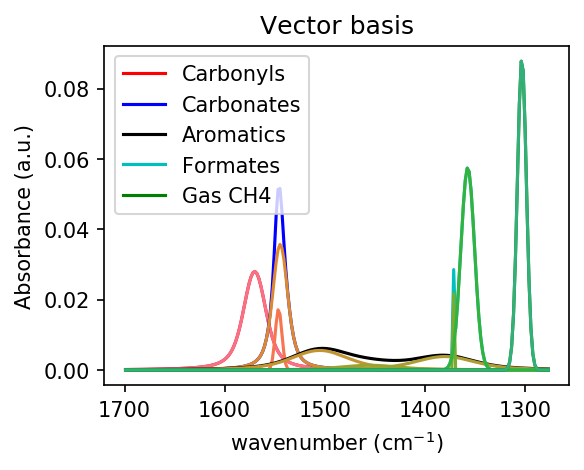

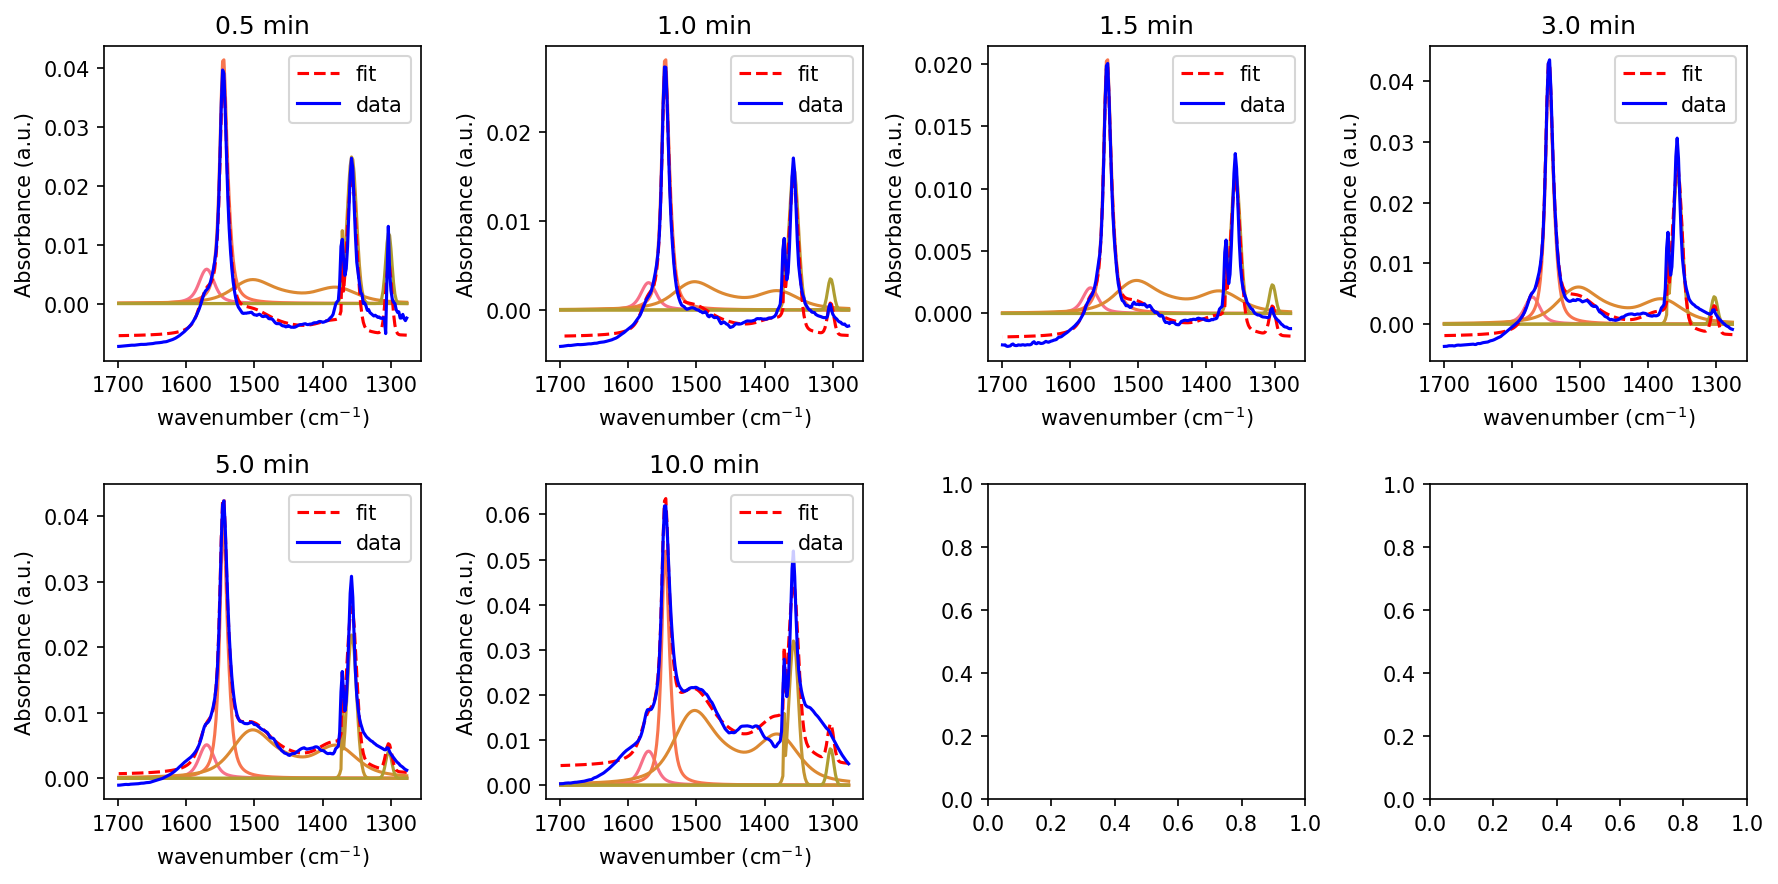

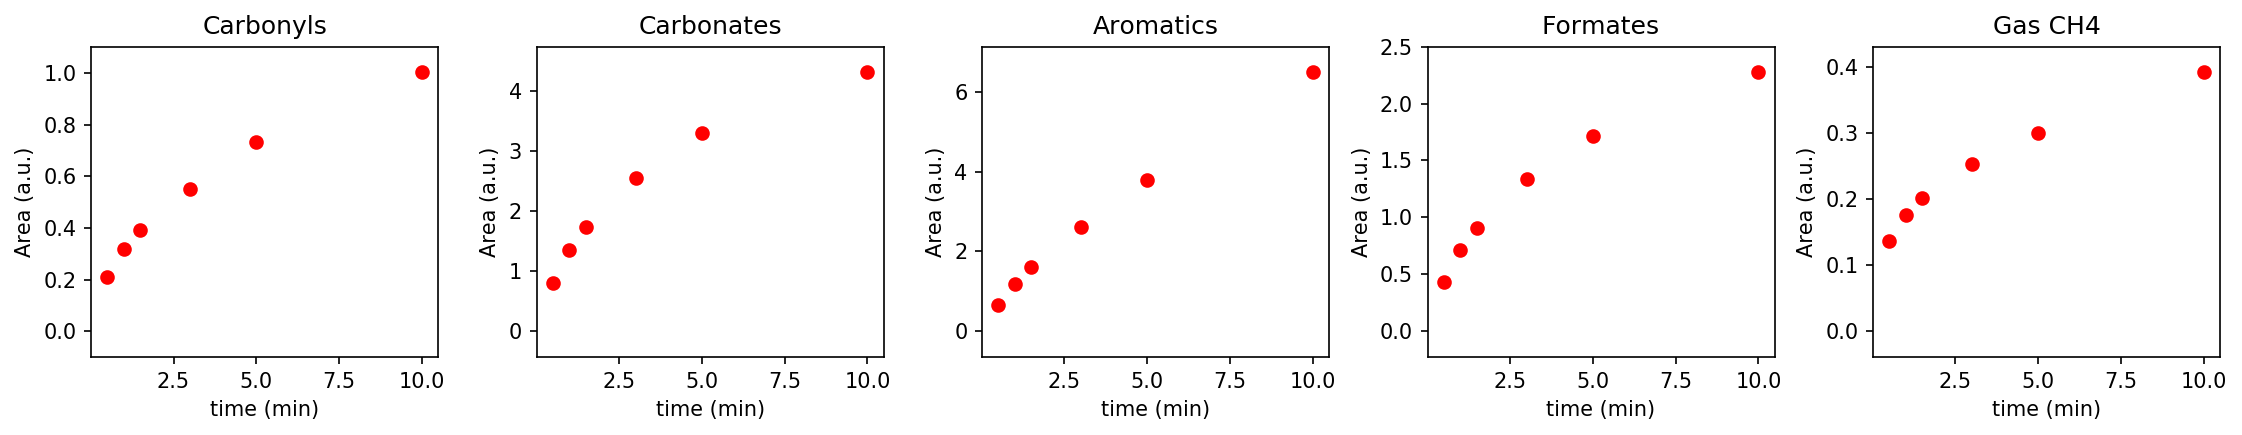

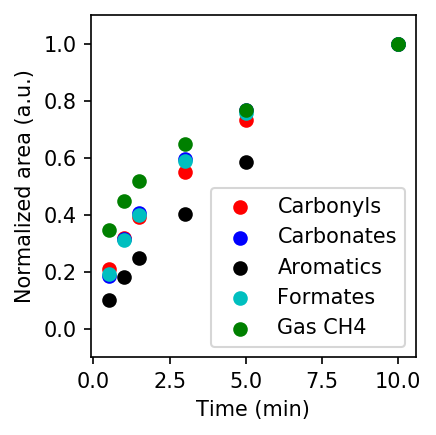

In [70]:
new_params_CC0 = result.params

yhat_CC0 = Generate_data(new_params_CC0,x_CC,Vec_fit_CC0,ndata=ndata)
print('The R2 score of the fit is: {:.2f}'.format( r2_score(y_CC[:ndata].flatten(), yhat_CC0.flatten())))
Vec_name_CC0 = np.array(['Carbonyls','Carbonates','Aromatics','Formates','Gas CH4'])
Plot_data(new_params_CC0,x_CC,y_CC[:ndata],Vec_fit_CC0,Time[:ndata],Vec_name_CC0,True)

### Fitting the Middle Stage (20,60) min

In [71]:
Vec_CC_IG1 = {'Mus':np.array([1601.5,1544.5,1548.3,1488.25,1424.5, 1349.9,1371.1,1357.8,1304]),
             'Sigmas':np.array([10,3.624,17.8,13.4,17.9, 22.9,1.764,4.375,2]),
             'Types':np.array([1,0,1,1,1,1,0,0,0]),
             'Fixed':None,#np.array([0,0,0,0,0,0,0,1,1,1]),
             'Lims':{'Positive':False,
                     'Mus_min':np.array([1595, 1537., 1500., 1460, 1370,1300, 1300, 1330, 1300.]),
                     'Mus_max':np.array([1615, 1580, 1580., 1500, 1400, 1370, 1400, 1400, 1310.])}
             }

In [72]:
t0 = time.time()
nstart = 6
ndata = 5

fit_params_IG1 = Generate_params_IG(x_CC,Vec_CC_IG1,ndata = ndata)

fitter = Minimizer(loss_func_IG, fit_params_IG1, fcn_args=(x_CC, y_CC[nstart:nstart+ndata], Vec_CC_IG1))
result = fitter.minimize(method='leastsq')
t1 = time.time() 

print('The time cost is:',t1-t0)

The time cost is: 173.85133624076843


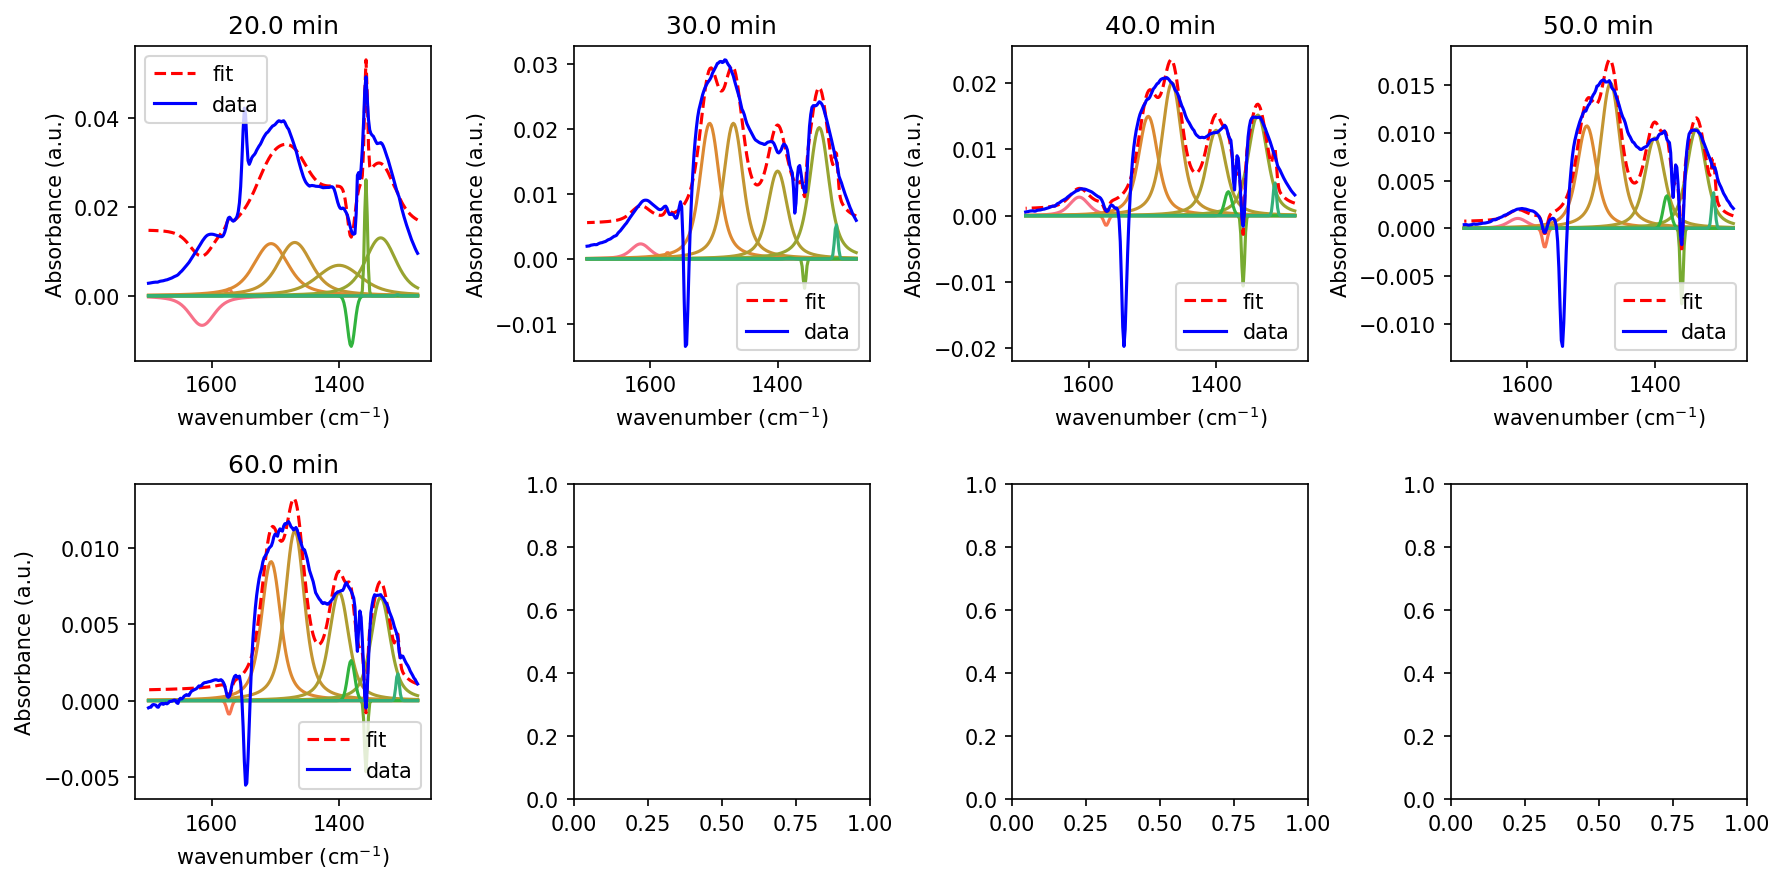

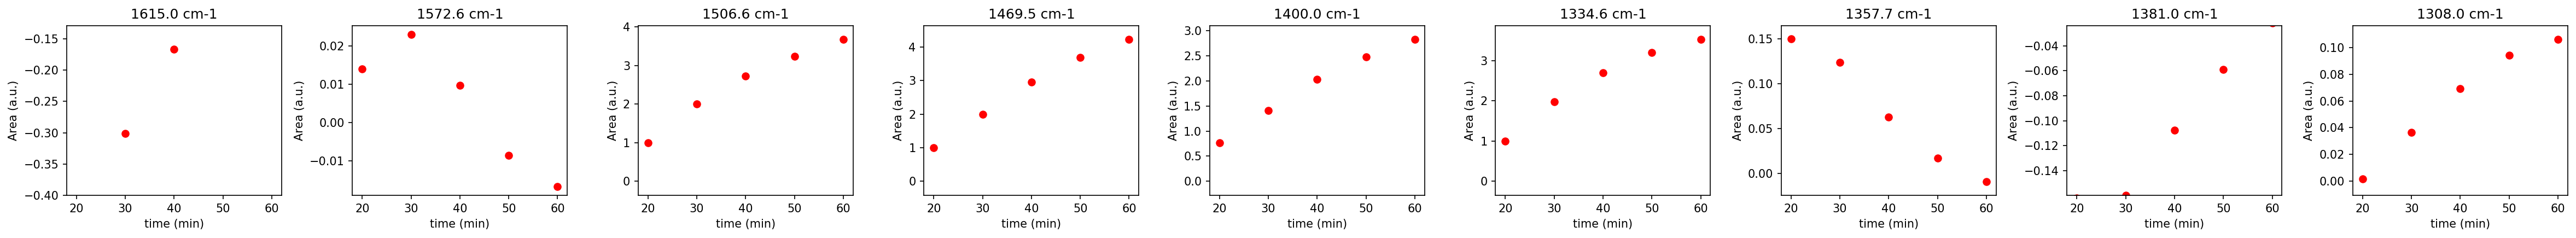

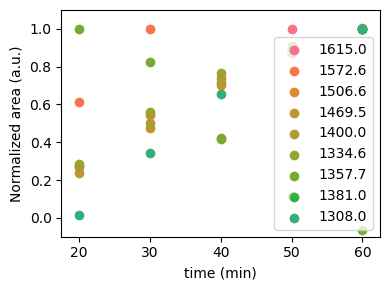

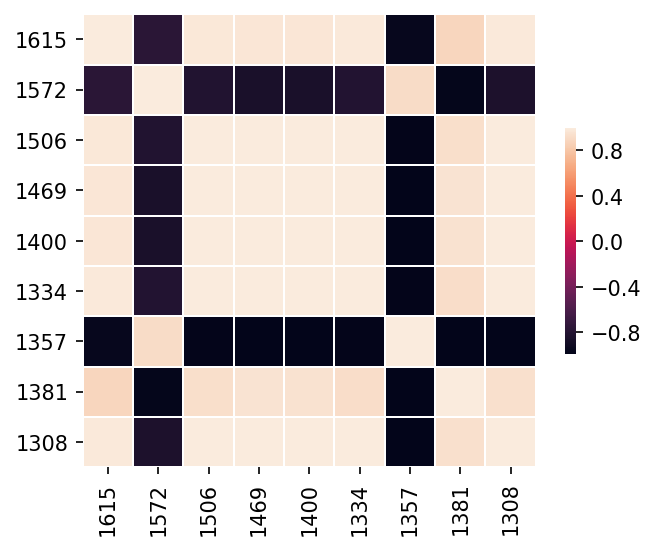

{'Peak Pos': [1615, 1572, 1506, 1469, 1400, 1334, 1357, 1381, 1308],
 'Amps': array([[-4.12002373e-01,  1.40962768e-02,  1.00000000e+00,
          1.00000000e+00,  7.65254912e-01,  1.00000000e+00,
          1.49834845e-01, -1.61802108e-01,  1.72008495e-03],
        [-3.00976898e-01,  2.30864574e-02,  2.00000000e+00,
          2.00000000e+00,  1.41300779e+00,  1.96868011e+00,
          1.23858086e-01, -1.59556168e-01,  3.65243024e-02],
        [-1.66364286e-01,  9.78423724e-03,  2.71901330e+00,
          2.96155179e+00,  2.03080789e+00,  2.69673984e+00,
          6.28939105e-02, -1.07735667e-01,  6.94203642e-02],
        [-1.16616654e-01, -8.44777435e-03,  3.23433245e+00,
          3.69261394e+00,  2.48557994e+00,  3.19706688e+00,
          1.73200918e-02, -5.89770952e-02,  9.42637514e-02],
        [-1.16945029e-01, -1.66435471e-02,  3.67036016e+00,
          4.22431291e+00,  2.82541896e+00,  3.52078592e+00,
         -9.44750345e-03, -2.15600394e-02,  1.05905716e-01]])}

In [73]:
params_IG1 = result.params
Plot_data_IG(params_IG1,x_CC,y_CC[nstart:nstart+ndata],Vec_CC_IG1,Time[nstart:nstart+ndata],True)

In [74]:
t0 = time.time()
#Vec_fit_CC1['Alphas'] = None
Vec_fit_CC1 = Generate_Vec_IG(params_IG,Vec_IG_CC0,ndata)
Vec_fit_CC1['Vec0']['Mus'][0]=1605.
Vec_fit_CC1['Vec0']['Lims'] = {'Peaks':np.array([0]),
                               'Specs':np.array([[1585],[1605],[0.1],[20],[0]]),
                               'Pos':None}
Vec_fit_CC1['Vec2']['Mus'][0] = 1480.
Vec_fit_CC1['Vec2']['Mus'][2] = 1340.
Vec_fit_CC1['Vec2']['Lims'] = {'Peaks':np.array([0,1,2]),
                               'Specs':np.array([[1400,1380,1300],
                                                 [1510,1500,1400],
                                                 [5,5,5.],
                                                 [25,25,25],
                                                 [0,0,0]]),
                                'Pos':None}
Vec_fit_CC1['Vec3']['Lims'] = {'Peaks':np.array([0,1]),
                               'Specs':np.array([[1355,1355],[1370,1370],[1.2,1.2],[3.5,4],[-10,-10]]),
                               'Pos':None}
Vec_fit_CC1['Vec4']['Lims'] = {'Peaks':np.array([0]),
                               'Specs':np.array([[0],[1615],[0.1],[4.5],[-10]]),
                               'Pos':None}
fit_params_CC1 = Generate_params(x_CC,Vec_fit_CC1,ndata =ndata)
fitter = Minimizer(loss_func, fit_params_CC1, fcn_args=(x_CC, y_CC[nstart:nstart+ndata], Vec_fit_CC1))
result = fitter.minimize(method='leastsq')
t1 = time.time() 

print('The time cost is:',t1-t0)

0 7.000071188064371 0.1 20.0
0 1605.0 1585.0 1605.0
1 3.624 0.1 8.624
1 1545.4057022853842 1540.4057022853842 1550.4057022853842
1 17.8 2.8000000000000007 32.8
1 1539.139869548265 1509.139869548265 1569.139869548265
2 9.38000000000012 5.0 24.38000000000012
2 1480.0 1450.0 1510.0
2 23.269999999999968 8.269999999999968 25.0
2 1414.077078750975 1384.077078750975 1444.077078750975
2 16.03037801019015 5.0 25.0
2 1340.0 1310.0 1370.0
3 2.2932 1.2 3.5
3 1371.6513283380511 1366.6513283380511 1370.0
3 5.687499999999996 1.2 4.0
3 1357.1549635627266 1355.0 1362.1549635627266
4 2.6 0.1 4.5
4 1303.2035340457808 1298.2035340457808 1308.2035340457808
The time cost is: 12.80974292755127


The R2 score of the fit is: 0.98
Plotting.....


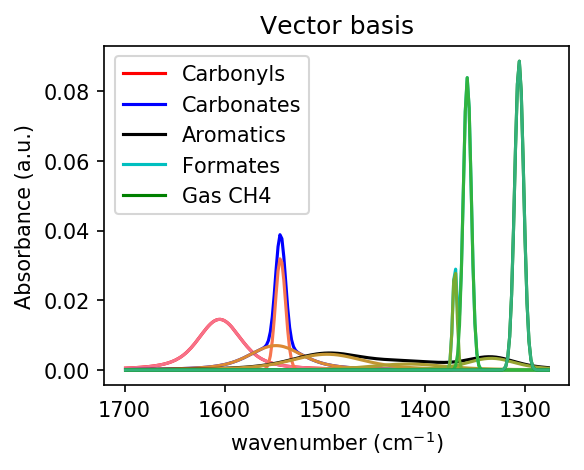

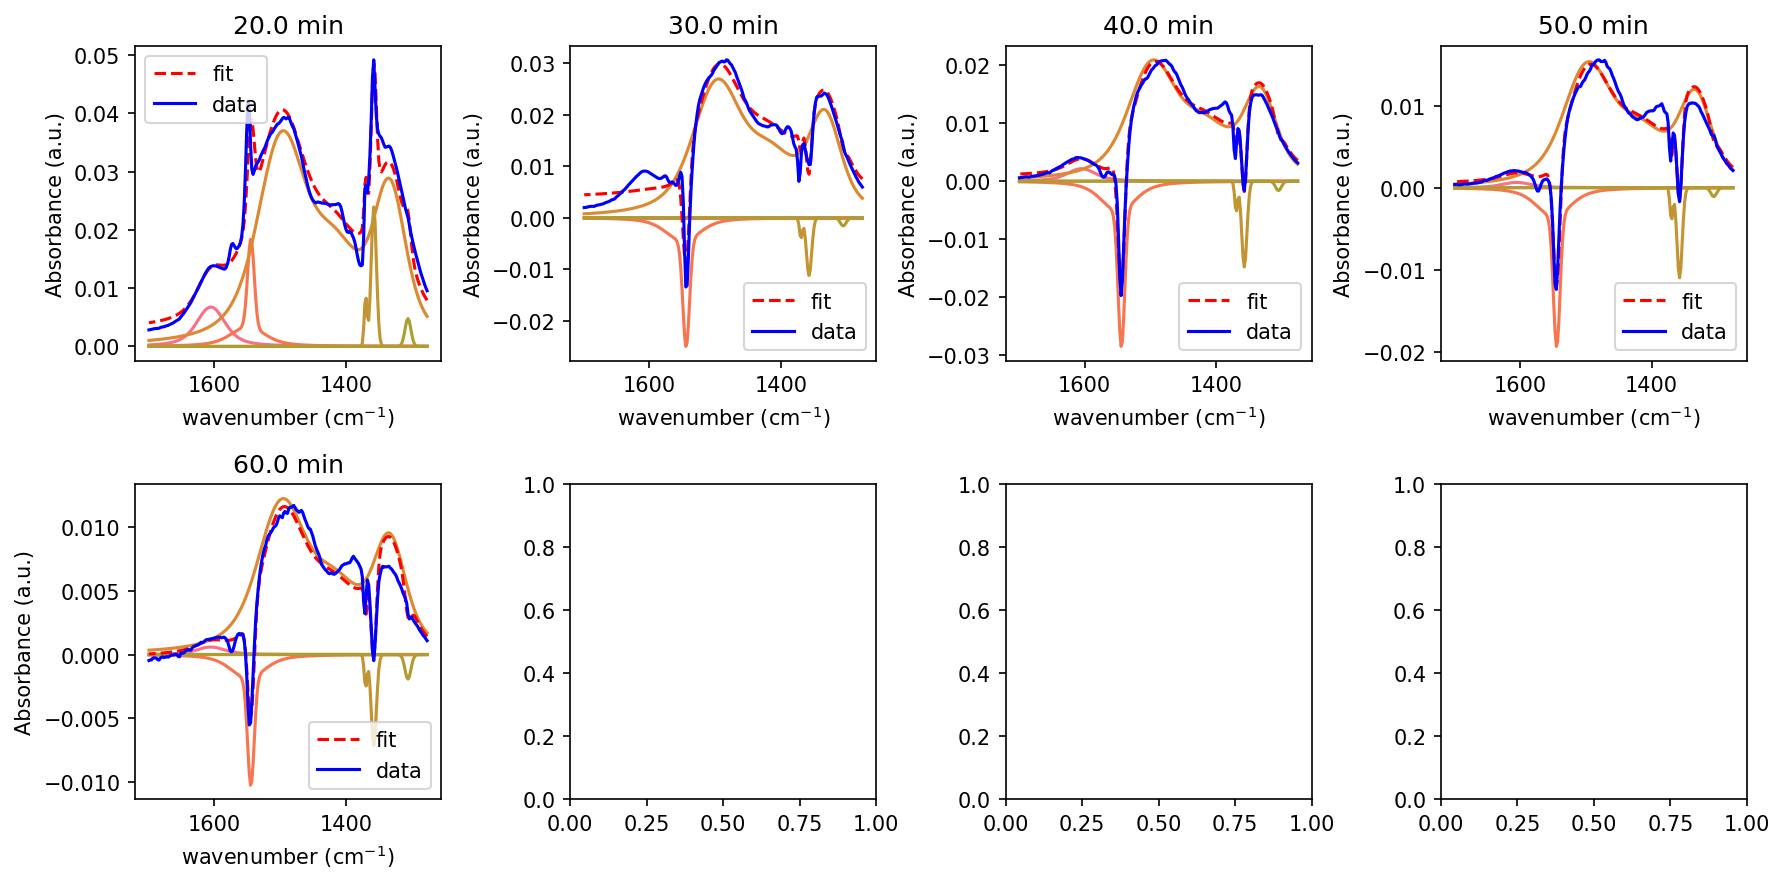

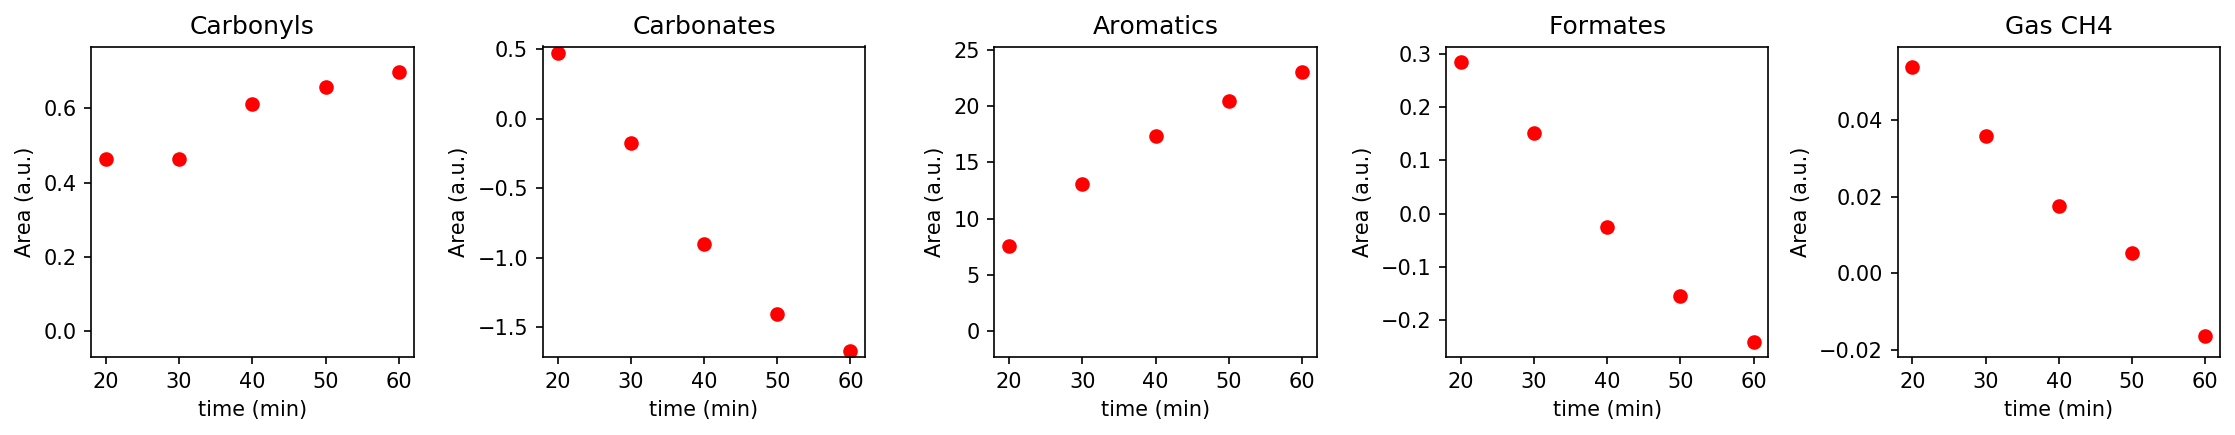

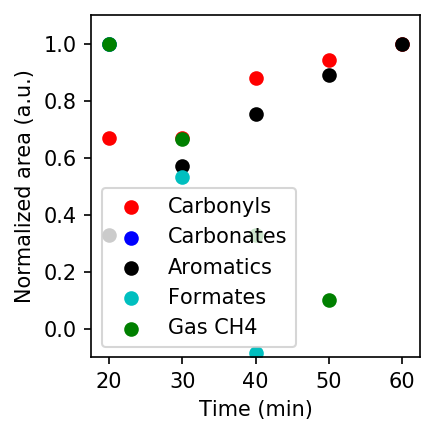

In [75]:
new_params_CC1 = result.params
yhat_CC1 = Generate_data(new_params_CC1,x_CC,Vec_fit_CC1,ndata=ndata)
print('The R2 score of the fit is: {:.2f}'.format( r2_score(y_CC[nstart:nstart+ndata].flatten(), yhat_CC1.flatten())))
Vec_name_CC0 = np.array(['Carbonyls','Carbonates','Aromatics','Formates','Gas CH4'])
Plot_data(new_params_CC1,x_CC,y_CC[nstart:nstart+ndata],Vec_fit_CC1,Time[nstart:nstart+ndata],Vec_name_CC0,True)

### Fitting the Final Stage (120,720) min

In [76]:
Vec_IG_CC2 = {'Mus':np.array([1600, 1544.8, 1541.7, 1473.6, 1386, 1352, 1369.1, 1357.9, 1303.9]),
             'Sigmas':np.array([15.9, 4.4,18.7, 20, 18, 8.7, 2.4, 4, 2.37]),
             'Types':np.array([1,0,1,1,1,1,0,0,0]),
             'Fixed':None,#np.array([0,0,0,0,0,0,0,1,1,1]),
             'Lims':{'Positive':False,
                     'Mus_min':np.array([1595,1537., 1500., 1460, 1370,1330, 1300, 1330, 1300.]),
                     'Mus_max':np.array([1615,1580, 1580., 1500, 1400, 1370, 1400, 1400, 1310.])}
             }


In [77]:
t0 = time.time()
nstart = 11
ndata = 7
fit_params_IG2 = Generate_params_IG(x_CC,Vec_IG_CC2,ndata = ndata)
fitter = Minimizer(loss_func_IG, fit_params_IG2, fcn_args=(x_CC, y_CC[nstart:nstart+ndata], Vec_IG_CC2))
result = fitter.minimize(method='leastsq')
t1 = time.time() 

print('The time cost is:',t1-t0)

The time cost is: 50.44524812698364


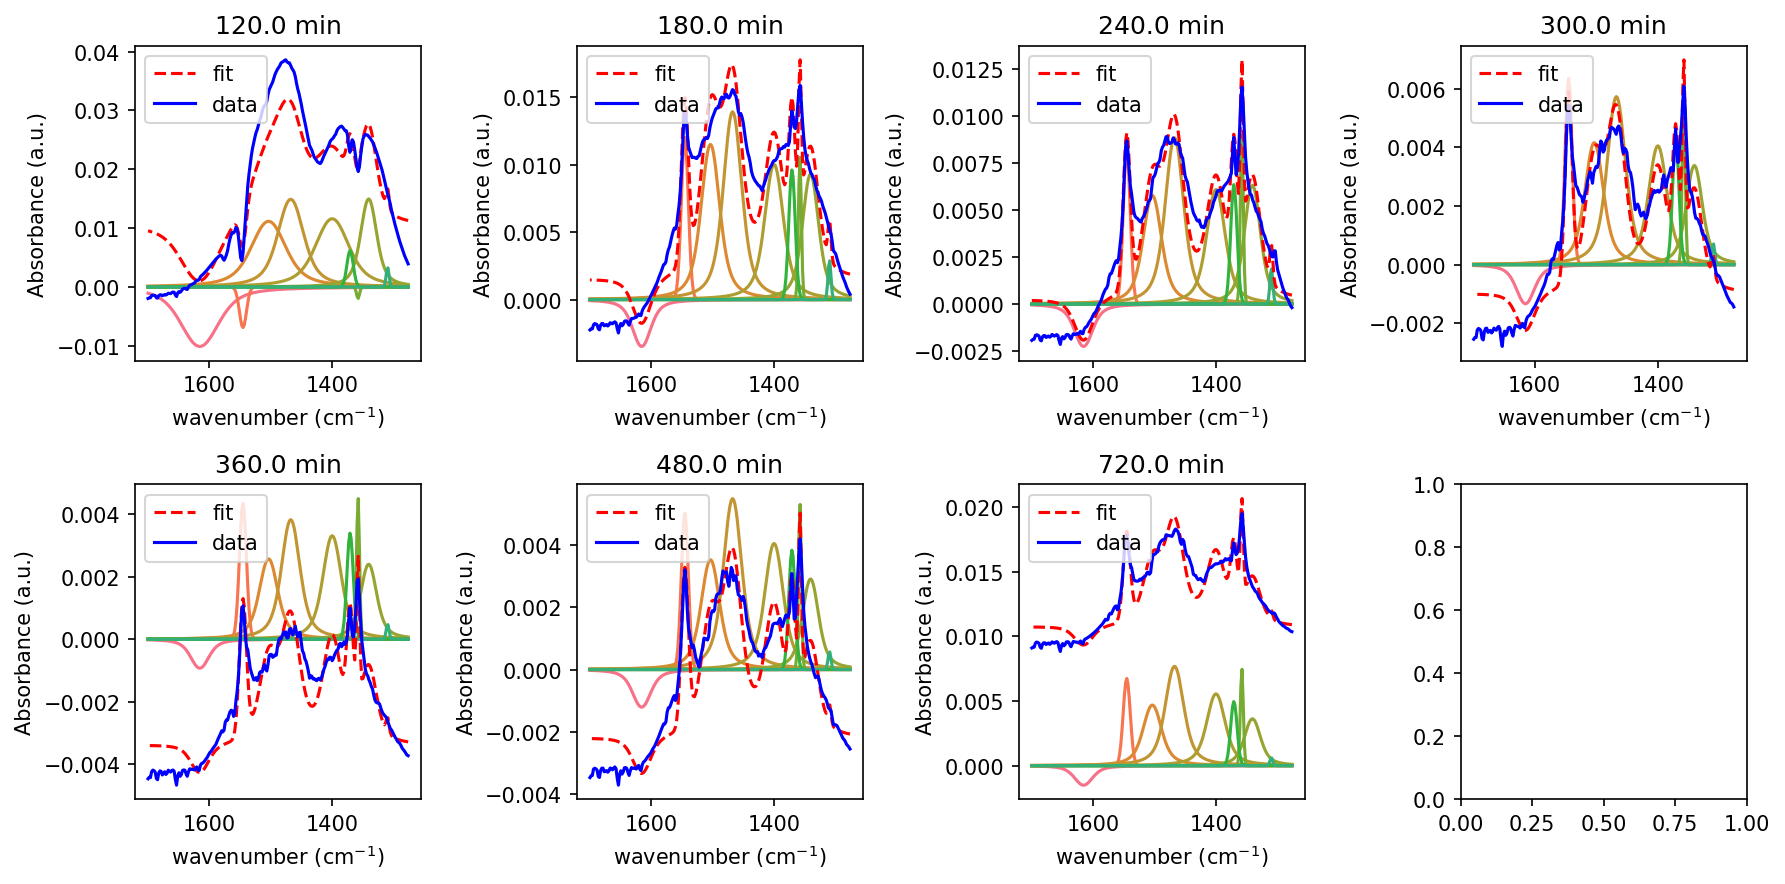

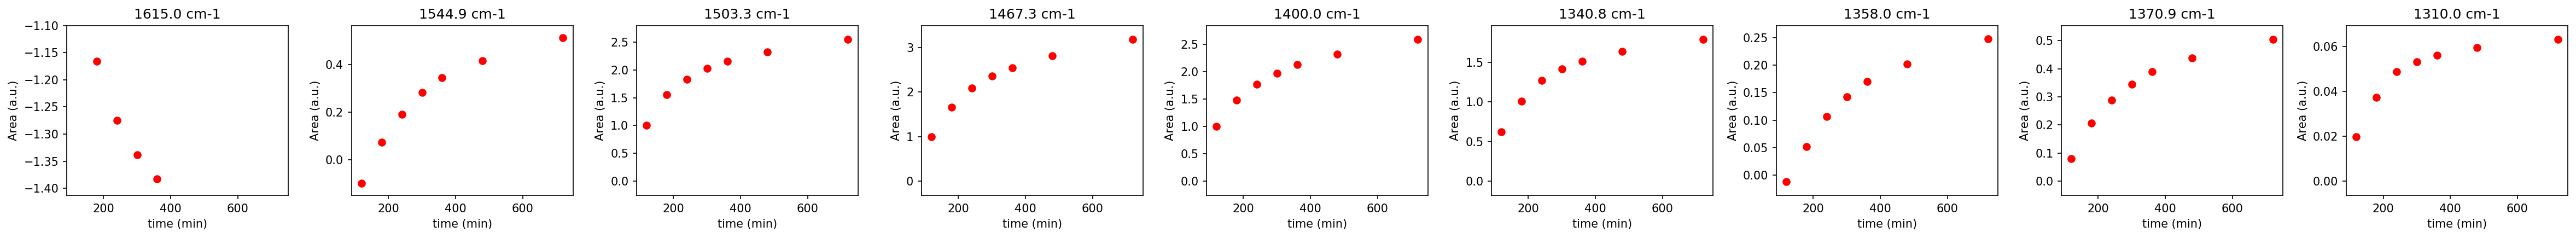

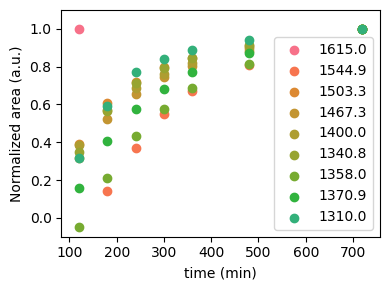

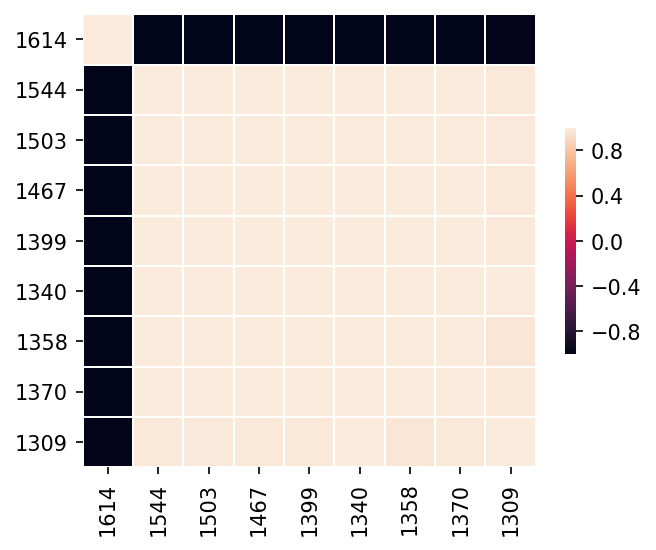

{'Peak Pos': [1614, 1544, 1503, 1467, 1399, 1340, 1358, 1370, 1309],
 'Amps': array([[-1.        , -0.0988123 ,  1.        ,  1.        ,  1.        ,
          0.62421008, -0.011756  ,  0.08070857,  0.01987964],
        [-1.16649195,  0.073585  ,  1.55116437,  1.66694447,  1.48036171,
          1.01189443,  0.05232157,  0.20604443,  0.03742021],
        [-1.27461163,  0.1901744 ,  1.82791374,  2.09092484,  1.77208842,
          1.27505518,  0.10686814,  0.28884305,  0.04883366],
        [-1.33845171,  0.28131365,  2.02738535,  2.3656227 ,  1.96636083,
          1.41613852,  0.1422482 ,  0.34468843,  0.05314117],
        [-1.38295984,  0.34378224,  2.15083213,  2.54920701,  2.12528219,
          1.51630217,  0.16965623,  0.38901563,  0.05598712],
        [-1.44076678,  0.41556856,  2.31954389,  2.81182303,  2.31901344,
          1.63740623,  0.20184566,  0.43893046,  0.05942503],
        [-1.51299717,  0.51231964,  2.54429946,  3.17997518,  2.585175  ,
          1.78862305,  0.24716195

In [78]:
params_IG2 = result.params
Plot_data_IG(params_IG2,x_CC,y_CC[nstart:nstart+ndata],Vec_IG_CC2,Time[nstart:nstart+ndata],True)

In [79]:
Vec_fit_CC2 = Generate_Vec_IG(params_IG2,Vec_IG_CC0,ndata)

In [80]:
t0 = time.time()

Vec_fit_CC2['Vec2']['Mus'][0]=1482.6
Vec_fit_CC2['Vec2']['Mus'][1]=1390.2
Vec_fit_CC2['Vec2']['Mus'][2]=1325.6
Vec_fit_CC2['Vec3']['Mus'][0]=1372.
Vec_fit_CC2['Vec3']['Mus'][1]=1357
Vec_fit_CC2['Alphas'] = None
Vec_fit_CC2['Vec0']['Lims'] = {'Peaks':np.array([0]),
                               'Specs':np.array([[0],[1610],[10],[15],[-10]]),
                              'Pos':None}
Vec_fit_CC2['Vec1']['Lims'] = {'Peaks':np.array([0,1]),
                               'Specs':np.array([[1580,1580],[1535,1525],[0.1,0.1],[8,10],[-1,-1]]),
                              'Pos':None}
Vec_fit_CC1['Vec2']['Lims'] = {'Peaks':np.array([0,1,2]),
                               'Specs':np.array([[1400,1360,1300],
                                                 [1510,1420,1400],
                                                 [5,5,5.],
                                                 [25,25,25],
                                                 [0,0,0]]),
                                'Pos':None}
Vec_fit_CC2['Vec3']['Lims'] = {'Peaks':np.array([0,1]),
                               'Specs':np.array([[1355,1355],[1375,1375],[1.2,1.2],[5,5],[-0.02,-0.02]]),
                              'Pos':None}

fit_params_CC2 = Generate_params(x_CC,Vec_fit_CC2,ndata=ndata)

fitter = Minimizer(loss_func, fit_params_CC2, fcn_args=(x_CC, y_CC[nstart:nstart+ndata], Vec_fit_CC0))
result = fitter.minimize(method='leastsq')
t1 = time.time() 

print('The time cost is:',t1-t0)

0 20.66999999994482 10 15
0 1614.9999998942737 1584.9999998942737 1610
1 5.719999999999996 0.7199999999999962 6.5
1 1544.910096157896 1580.0 1535.0
1 18.7 3.6999999999999993 10.0
1 1503.3208061424714 1580.0 1525.0
2 14.000000000003746 0.1 29.000000000003745
2 1482.6 1452.6 1512.6
2 18.0 3.0 33.0
2 1390.2 1360.2 1420.2
2 8.7 0.1 23.7
2 1325.6 1295.6 1355.6
3 2.4 1.2 5.0
3 1372.0 1367.0 1375.0
3 5.199999999999999 1.2 5.0
3 1357.0 1355.0 1362.0
4 2.37 0.1 7.37
4 1309.9999999672698 1304.9999999672698 1314.9999999672698
The time cost is: 16.353394985198975


The R2 score of the fit is: 0.99
Plotting.....


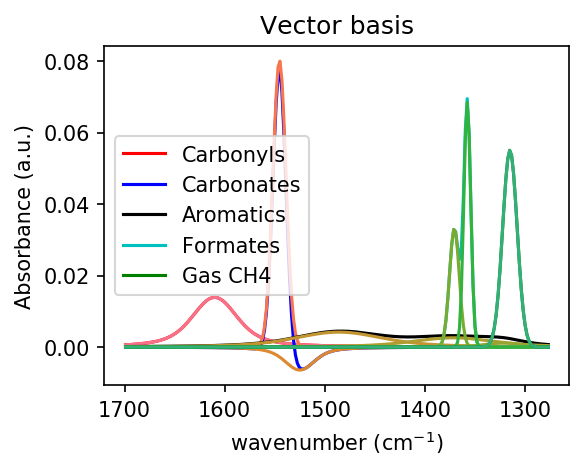

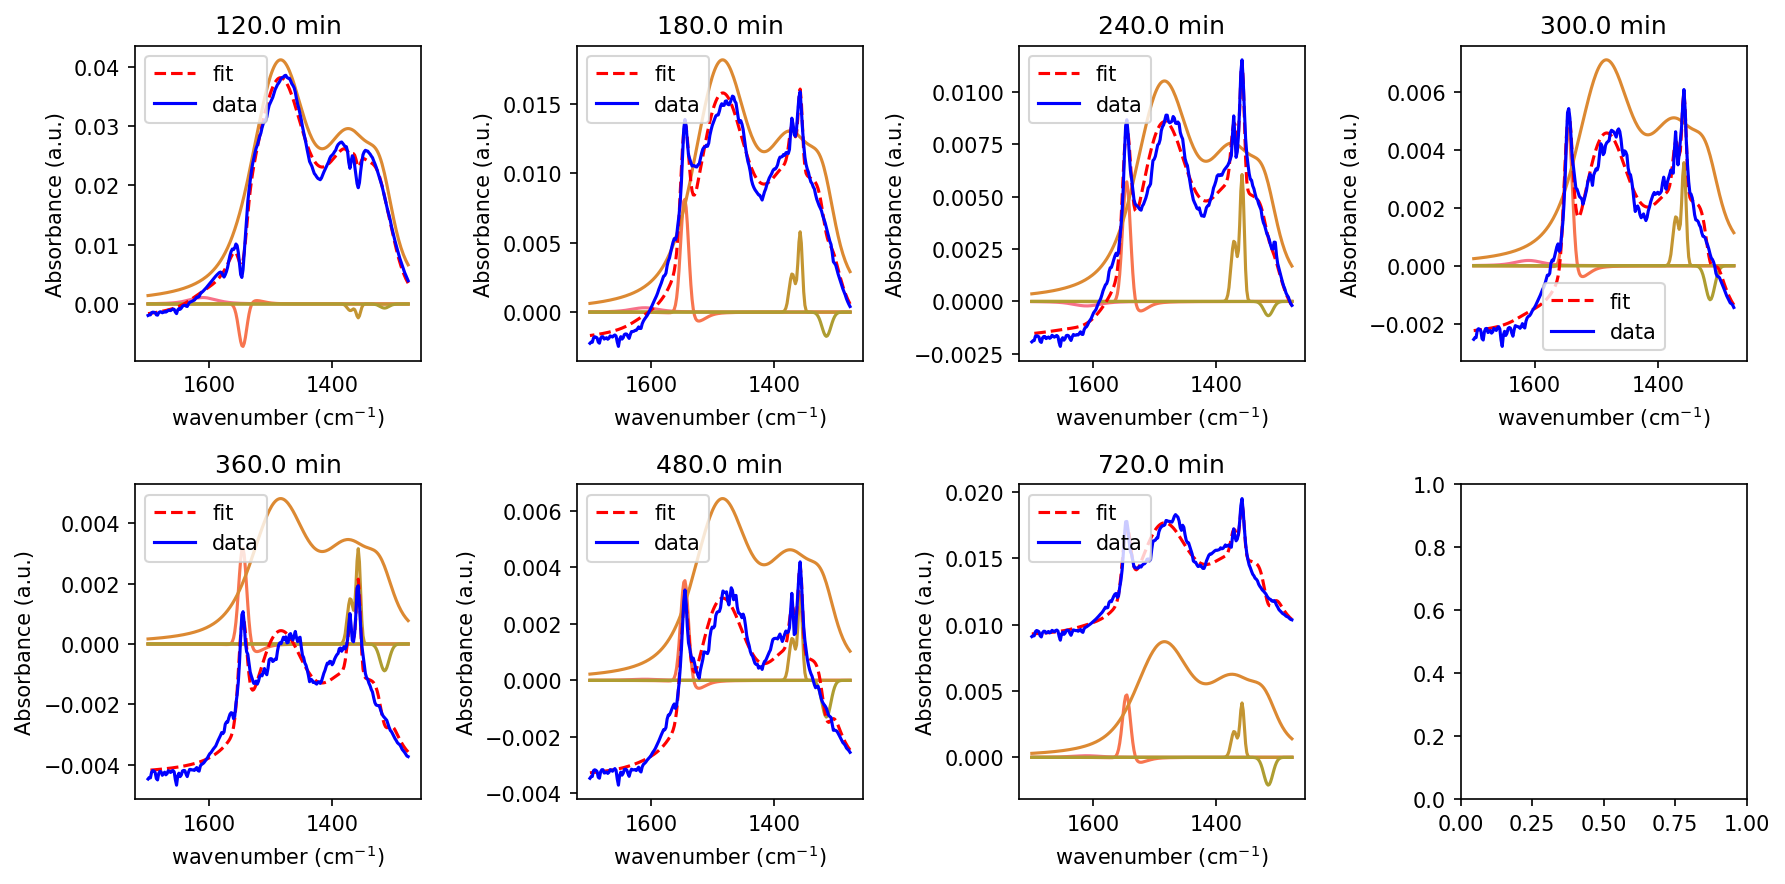

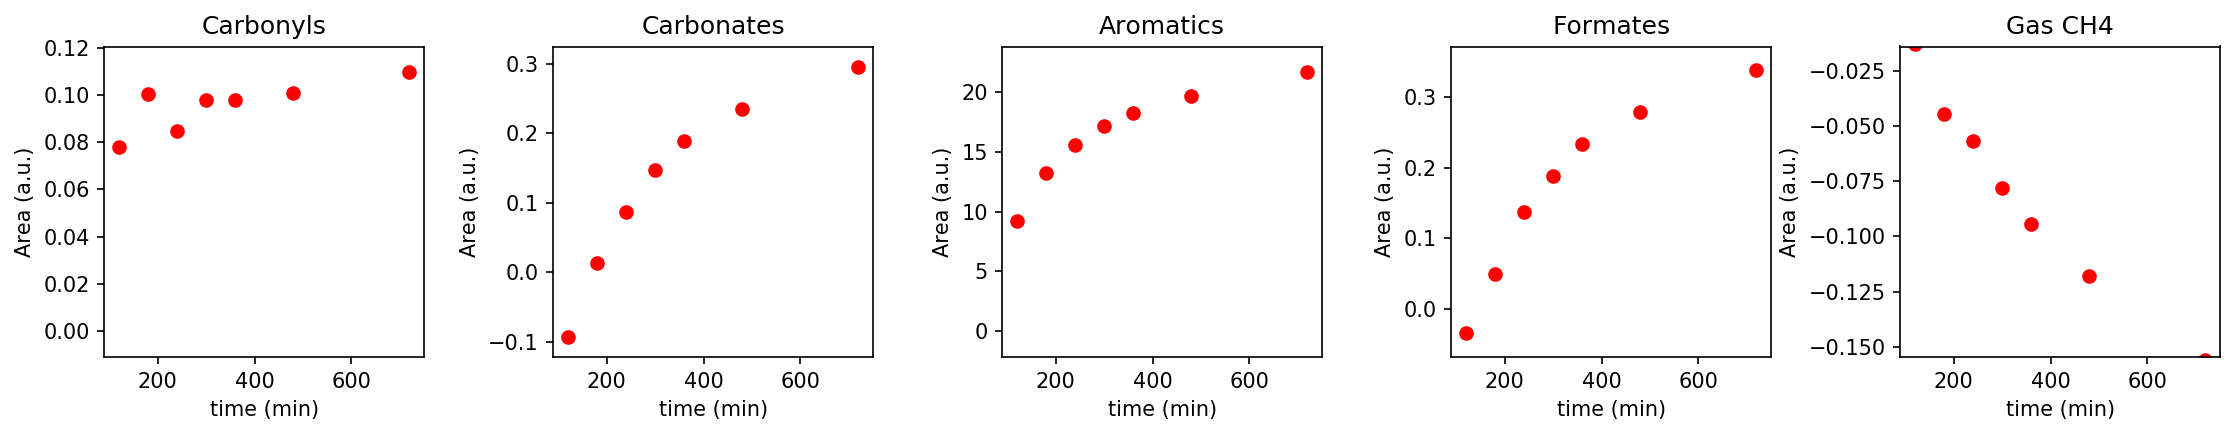

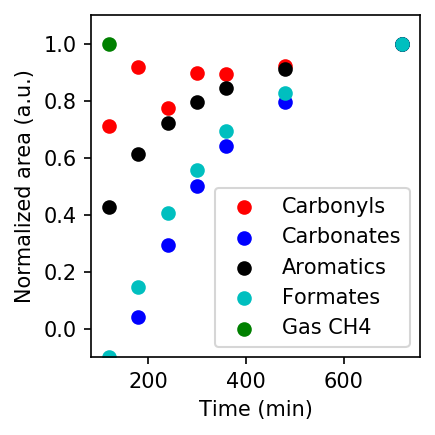

In [81]:
new_params_CC2 = result.params
yhat_CC2 = Generate_data(new_params_CC2,x_CC,Vec_fit_CC2,ndata=ndata)
print('The R2 score of the fit is: {:.2f}'.format( r2_score(y_CC[nstart:nstart+ndata].flatten(), yhat_CC2.flatten())))
Plot_data(new_params_CC2,x_CC,y_CC[nstart:nstart+ndata],Vec_fit_CC2,Time[nstart:nstart+ndata],Vec_name_CC0,True)

### Combine the three Stages Together

Now, we want to evaluate the evolution of different species over the entire experiment period through combining the three stages together. 

In [82]:
def Plot_com_data(Param_com, Vec, Time, Vec_name, Dif, Ignore = [4]):
    color = ['r','b','k','c','g','m','y']
    nPara_set = len(Param_com['Params'])
    nVec = len(Vec['Peaks'])
    data = np.zeros((nVec,len(Time)))
    for l in range(nPara_set):
        ndata = Param_com['Lens'][l]
        for i in range(ndata):
            if l == 0:
                T_ind = i
            else: 
                T_ind = i + np.cumsum(Param_com['Lens'])[l-1]
            for j in range(nVec):
                amp_tem = 0 
                nPeak = len(Vec['Peaks'][j])
                for k in range(nPeak):
                    amp_tem = amp_tem + Param_com['Params'][l]['amp_{}{}{}'.format(i,j,k)]
                
                data[j,T_ind] = amp_tem
    data = np.cumsum(data, axis=1)
    
    List = (list(range(nVec)))
    if Ignore is not None:
        for i in range(len(Ignore)):
            del List[Ignore[i]]
    fig, axes = plt.subplots(1,len(List),figsize=(len(List)*3, 3), dpi = 150)
    for j,i in enumerate(List):
        axes[i].scatter(Time,data[i],c=color[0])
        axes[i].set_xlabel('Time (min)')
        axes[i].set_ylabel('Peak area (a.u.)')
        axes[i].set_title(Vec_name[i])
    plt.tight_layout()
    fig,ax = plt.subplots(1,1,figsize=(3,3), dpi=150)
    for j,i in enumerate(List):
        MaxVec = data[i]/np.max(data[i])
        ax.scatter(Time,MaxVec,c=color[i], label = Vec_name[i])
    ax.set_xlabel('Time (min)')
    ax.set_ylabel('Normalized Peak Area (a.u.)')
    ax.set_ylim((0,1.1))
    ax.legend()
    plt.tight_layout()
    return data

array([[ 0.20826316,  0.31812539,  0.39165836,  0.55096976,  0.7337768 ,
         1.00315285,  1.46769218,  1.46769218,  1.61519696,  1.6590706 ,
         1.69942888,  1.77737954,  1.79980218,  1.78434406,  1.79748522,
         1.79734971,  1.80026471,  1.80899824],
       [ 0.80140632,  1.34663824,  1.740371  ,  2.5565974 ,  3.30163918,
         4.30618242,  4.7795179 ,  4.13587484,  3.40286931,  2.90473641,
         2.64025215,  2.5474532 ,  2.65273653,  2.72674077,  2.7878302 ,
         2.82892285,  2.87461152,  2.93554284],
       [ 0.66017724,  1.17619845,  1.60581416,  2.59851432,  3.79718093,
         6.48382578, 14.05120095, 19.55270793, 23.82328218, 26.96172225,
        29.46712925, 38.67690286, 42.73768095, 45.09054442, 46.68088949,
        47.75703578, 49.19351529, 51.1415315 ],
       [ 0.43331102,  0.70949485,  0.90501607,  1.33592308,  1.71680919,
         2.27355571,  2.55894515,  2.42510899,  2.24895513,  2.11799638,
         2.03252985,  1.99883216,  2.08202419,  2.169

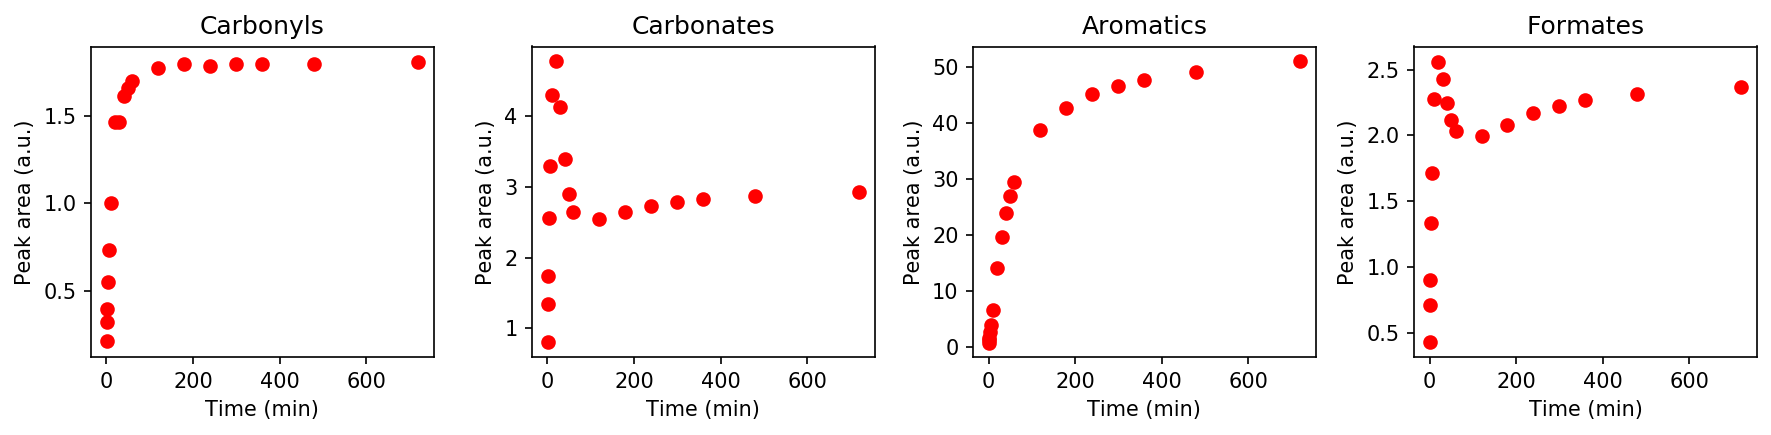

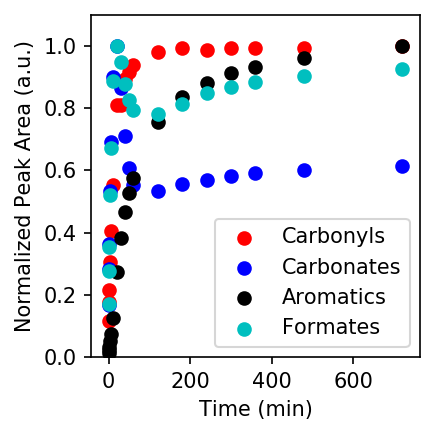

In [83]:
Param_com = {'Params': (new_params_CC0,new_params_CC1,new_params_CC2) ,
            'Lens':np.array([6,5,7])}
Plot_com_data(Param_com,Vec_IG_CC0,Time,Vec_name_CC0,True)

## Fitting the 1000 - 1300 cm$^{-1}$ region

This region contains charistic peaks from C-O speices. 

In [84]:
Vec_IG_CO = {'Mus':np.array([1216.8, 1055, 1112.2]),
          'Sigmas':np.array([5.3,13.6,15.3]),
          'Types':np.array([0,1,1]),
          'Lims':None}


In [86]:
def Generate_params_IG(x,Vec,ndata):
    params = Parameters()
    npeak = len( Vec['Mus'])
    alpha = np.ones((npeak,ndata))*0.005

    Min = x.min()
    Max = x.max()
    if Vec['Lims'] is None:
        amp_min = -1
        Mus_min_bool = False
        Mus_max_bool = False
    else:
        if Vec['Lims']['Positive'] is None:
            amp_min = -1
        else:
            if Vec['Lims']['Positive']:
                amp_min = 0
            else:
                amp_min = -1
        if Vec['Lims']['Mus_min'] is None:
            Mus_min_bool = False
        else:
            Mus_min_bool = True
        if Vec['Lims']['Mus_max'] is None:
            Mus_max_bool = False
        else:
            Mus_max_bool = True

    for i in range(ndata):
        params.add('lin_{}'.format(i), value=0, min=-1, max =1)
        for j in range(npeak):
            mu = Vec['Mus'][j]
            sigma = Vec['Sigmas'][j]
            amp = alpha[j,i]
            if Mus_min_bool:
                mu_min = Vec['Lims']['Mus_min'][j]
            else:
                mu_min = mu*0.9
            if Mus_max_bool:
                mu_max = Vec['Lims']['Mus_max'][j]
            else:
                mu_max = mu*1.1
            if i ==0:
                params.add('amp_{}{}'.format(i,j), value=amp, min=amp_min,  max=1)
                params.add('cen_{}{}'.format(i,j), value=mu, min=mu_min,  max=mu_max)
                params.add('sig_{}{}'.format(i,j), value=sigma, min=0.7*sigma,  max=1.3*sigma)
            else:
                params.add('amp_{}{}'.format(i,j), value=amp, min=amp_min,  max=1)
                params.add('cen_{}{}'.format(i,j), min=Min,  max=Max, expr='cen_{}{}'.format(0,j))
                params.add('sig_{}{}'.format(i,j), min=0.1,  max=10, expr='sig_{}{}'.format(0,j))
    return params

In [87]:
t0 = time.time()
fit_params_IG_CO = Generate_params_IG(x_CO,Vec_IG_CO,ndata =18)

fitter = Minimizer(loss_func_IG, fit_params_IG_CO, fcn_args=(x_CO, y_CO, Vec_IG_CO))
result = fitter.minimize(method='leastsq')
t1 = time.time() 

print('The time cost is:',t1-t0)

The time cost is: 7.568259000778198


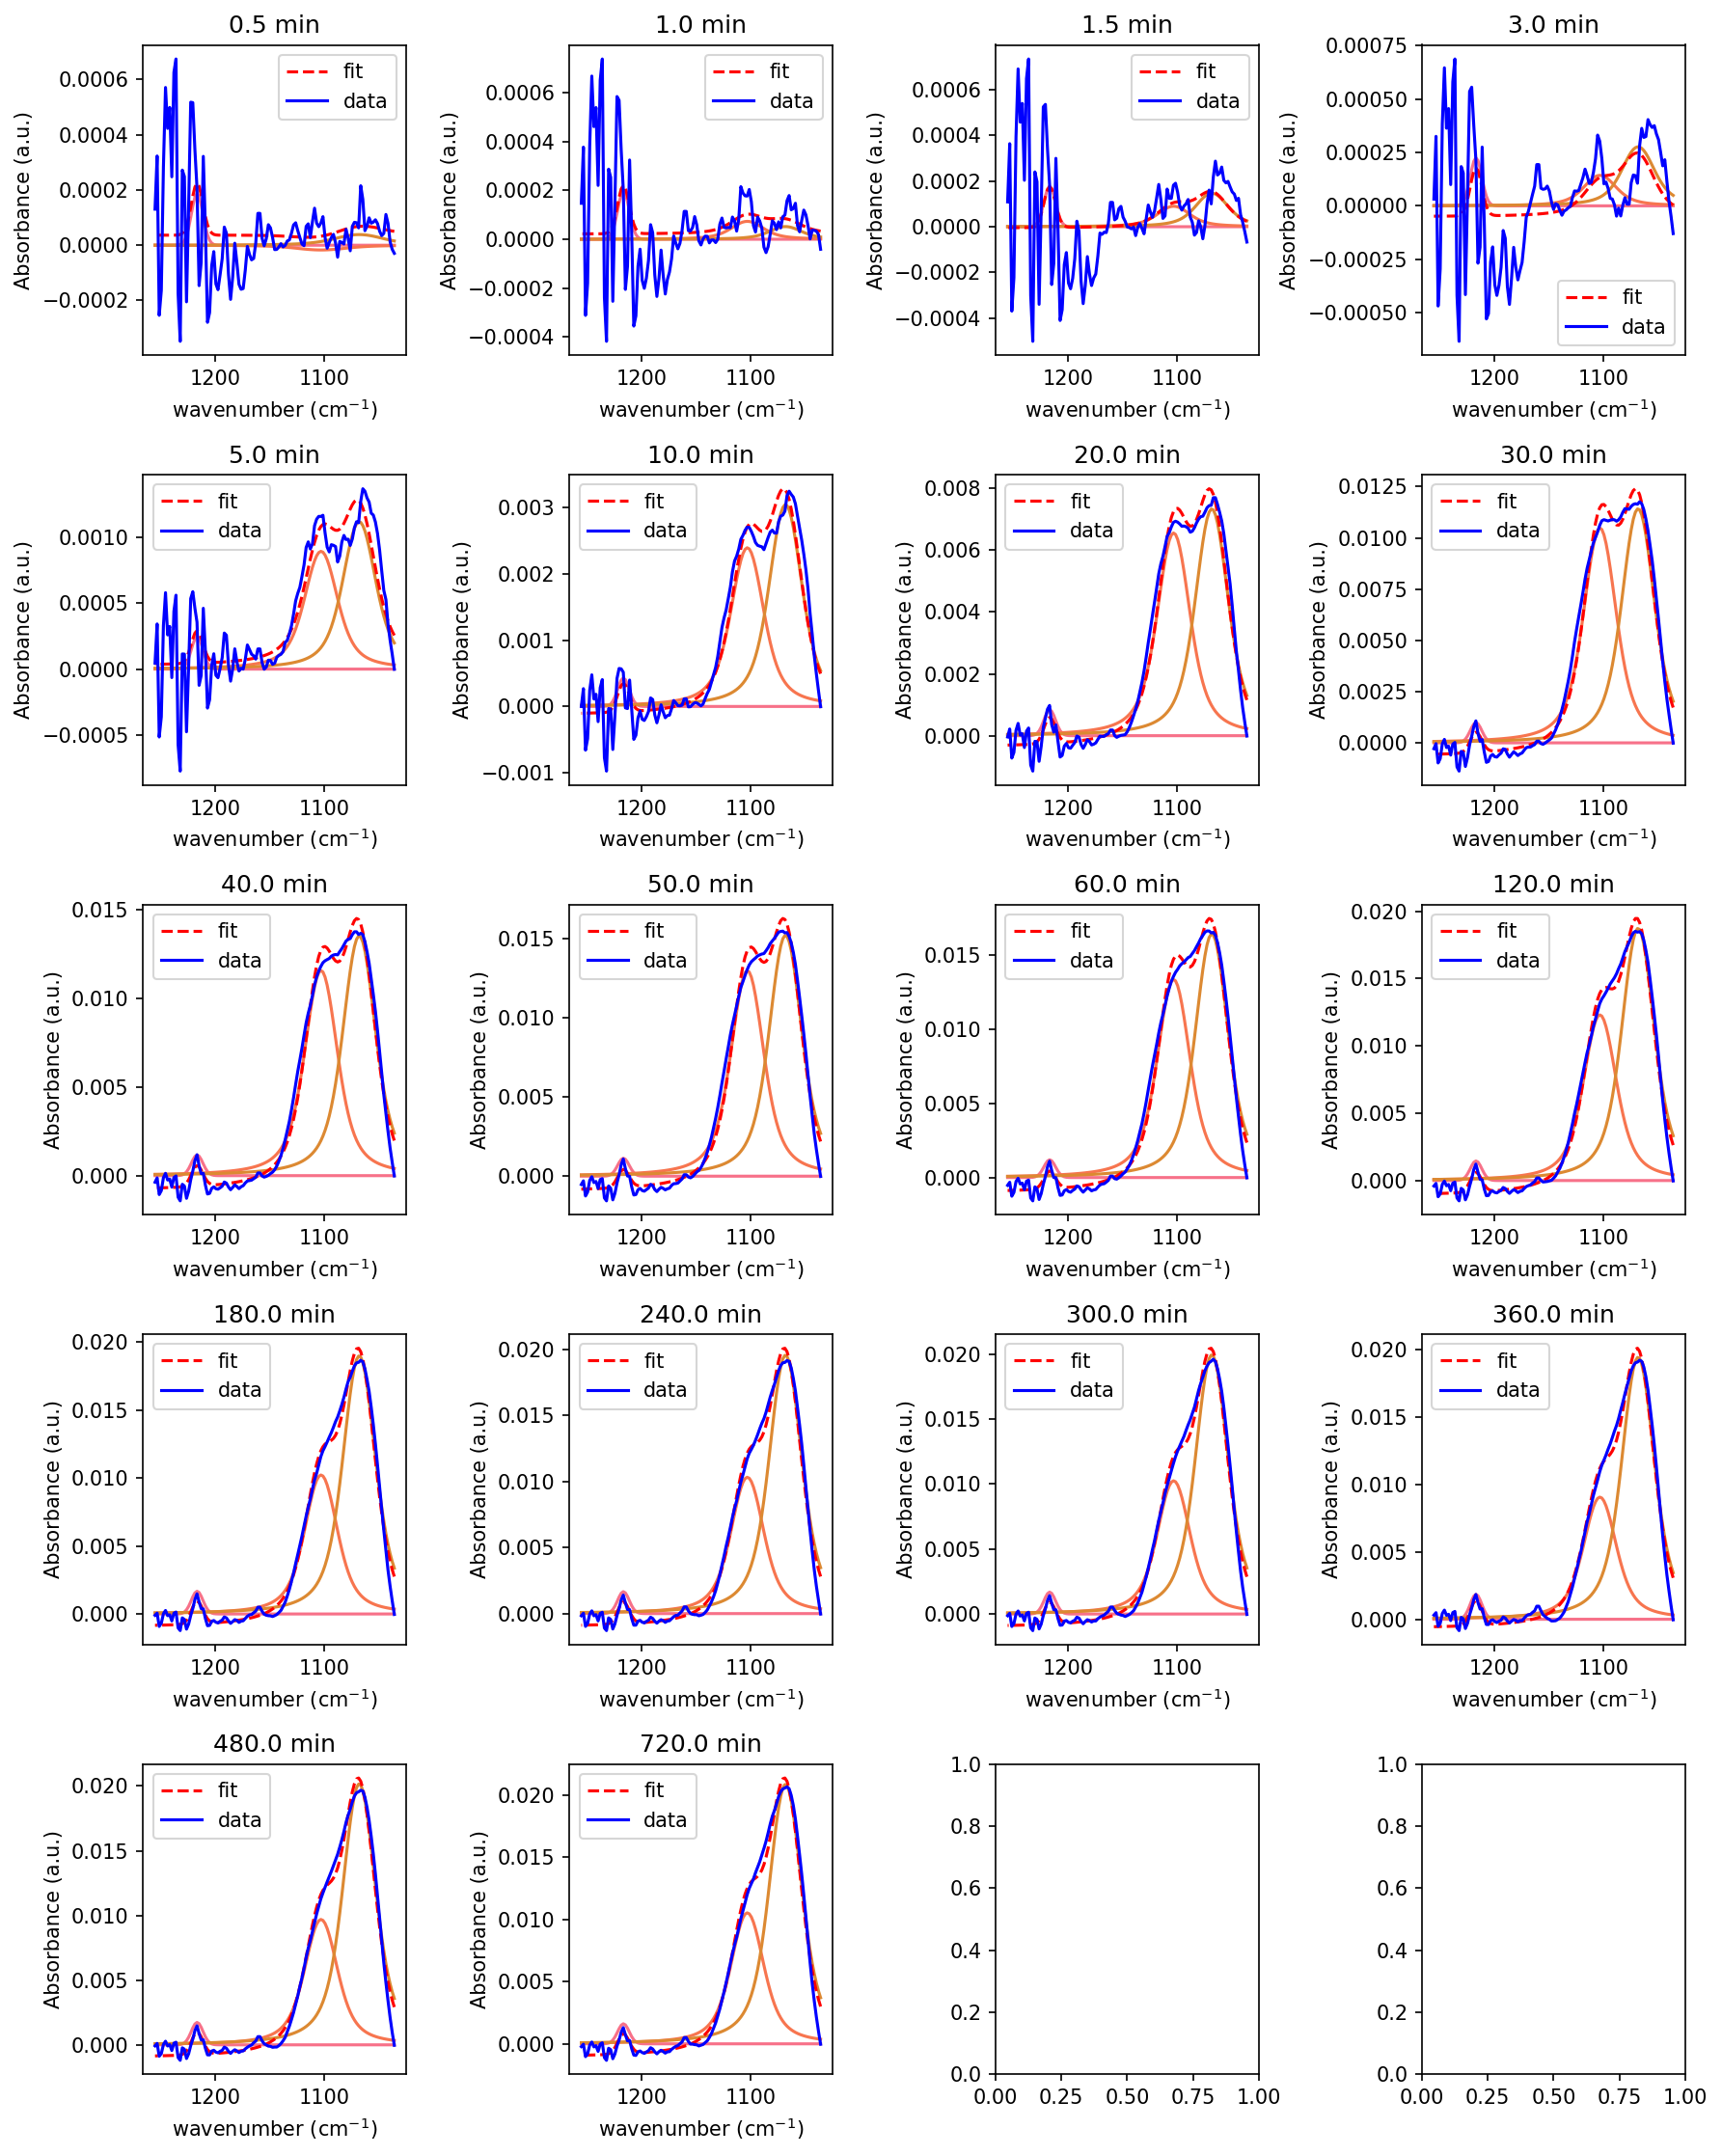

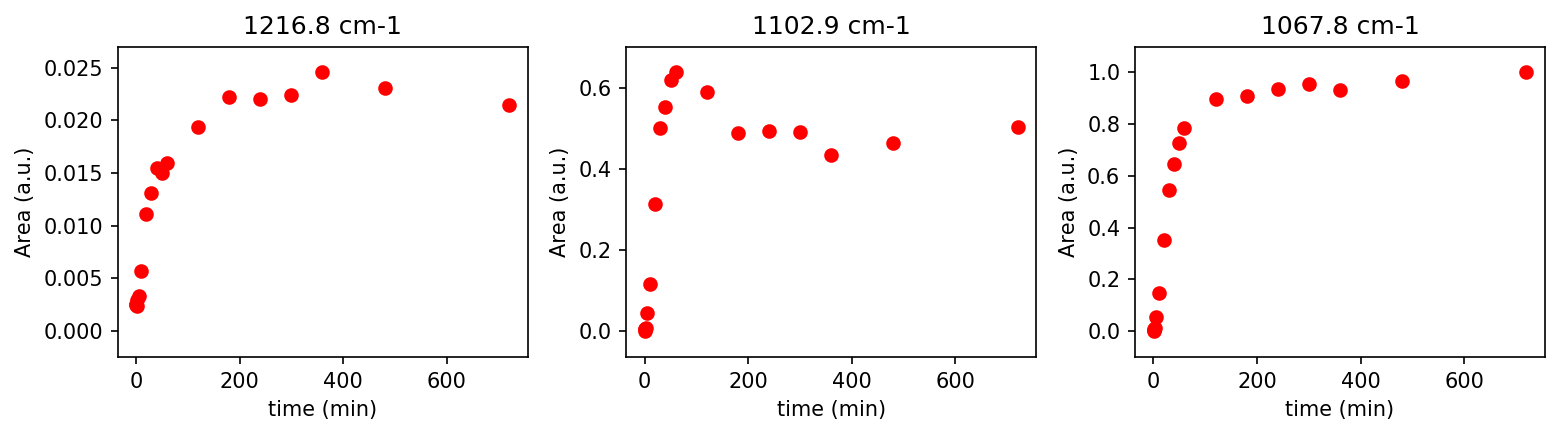

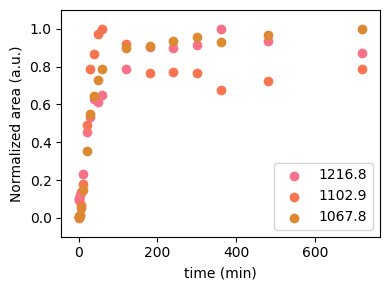

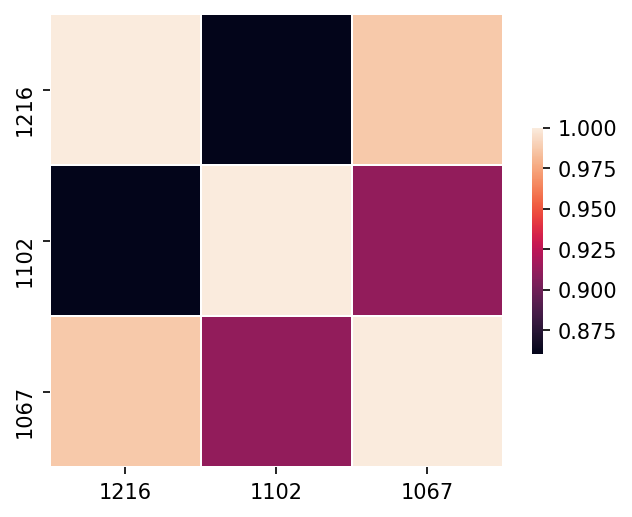

{'Peak Pos': [1216, 1102, 1067],
 'Amps': array([[ 0.0024939 , -0.00130714,  0.00282695],
        [ 0.00262385,  0.00350685,  0.00248285],
        [ 0.00236922,  0.00429947,  0.00703599],
        [ 0.00298616,  0.00683928,  0.01324071],
        [ 0.00329829,  0.04292953,  0.05371887],
        [ 0.00570276,  0.11479061,  0.14597738],
        [ 0.01116119,  0.31428583,  0.35160959],
        [ 0.01313085,  0.50222195,  0.54707181],
        [ 0.01545771,  0.5538674 ,  0.64740642],
        [ 0.01503905,  0.62114716,  0.72755147],
        [ 0.01590683,  0.63914326,  0.78566766],
        [ 0.01932061,  0.58966606,  0.89766728],
        [ 0.02222757,  0.49010606,  0.91018274],
        [ 0.02204076,  0.49433462,  0.93687965],
        [ 0.02239765,  0.49098996,  0.95492751],
        [ 0.02454506,  0.43376826,  0.9305194 ],
        [ 0.0230284 ,  0.46424138,  0.96624794],
        [ 0.02143757,  0.50482631,  0.99999998]])}

In [88]:
params_IG_CO = result.params
Plot_data_IG(params_IG_CO,x_CO,y_CO,Vec_IG_CO,Time,False)

In [90]:
Vec_IG_struc_CO = {'Peaks':[[0,2],[1]],'Types':[[0,1],[1]]}
Vec_fit_CO = Generate_Vec_IG(params_IG_CO,Vec_IG_struc_CO,18)
#Vec_fit['Vec0']['Lims'] = {'Peaks':np.array([0,1,2,3]),
 #                          'Specs':np.array([[0.1,0.1,0.1,0.1],
 #                                           [4000,4000,4000,4000],
 #                                           [0.1,.1,0.1,0.1],
  #                                          [6.5,6.5,6.5,6.5]])}



In [91]:
t0 = time.time()
fit_params_CO = Generate_params(x_CO,Vec_fit_CO,ndata = 18)

fitter = Minimizer(loss_func, fit_params_CO, fcn_args=(x_CO, y_CO, Vec_fit_CO))
result = fitter.minimize(method='leastsq')
t1 = time.time()

print('The time cost is:',t1-t0)

0 5.3 0.2999999999999998 10.3
0 1216.7603715153539 1211.7603715153539 1221.7603715153539
0 15.3 0.3000000000000007 30.3
0 1067.847907095902 1037.847907095902 1097.847907095902
1 15.855658153666548 0.855658153666548 30.855658153666546
1 1102.9218019869718 1072.9218019869718 1132.9218019869718
The time cost is: 5.370253801345825


The R2 score of the fit is: 0.99
Plotting.....


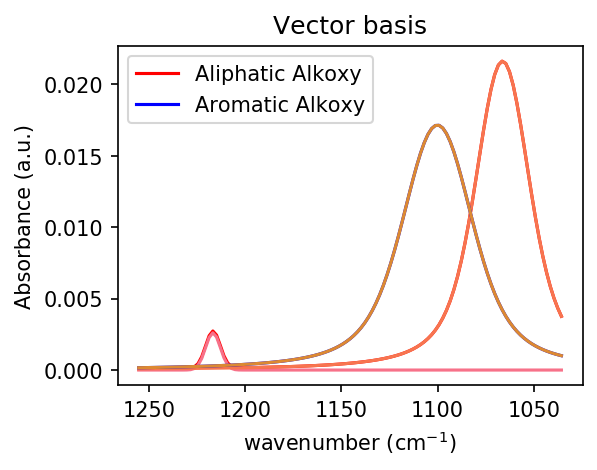

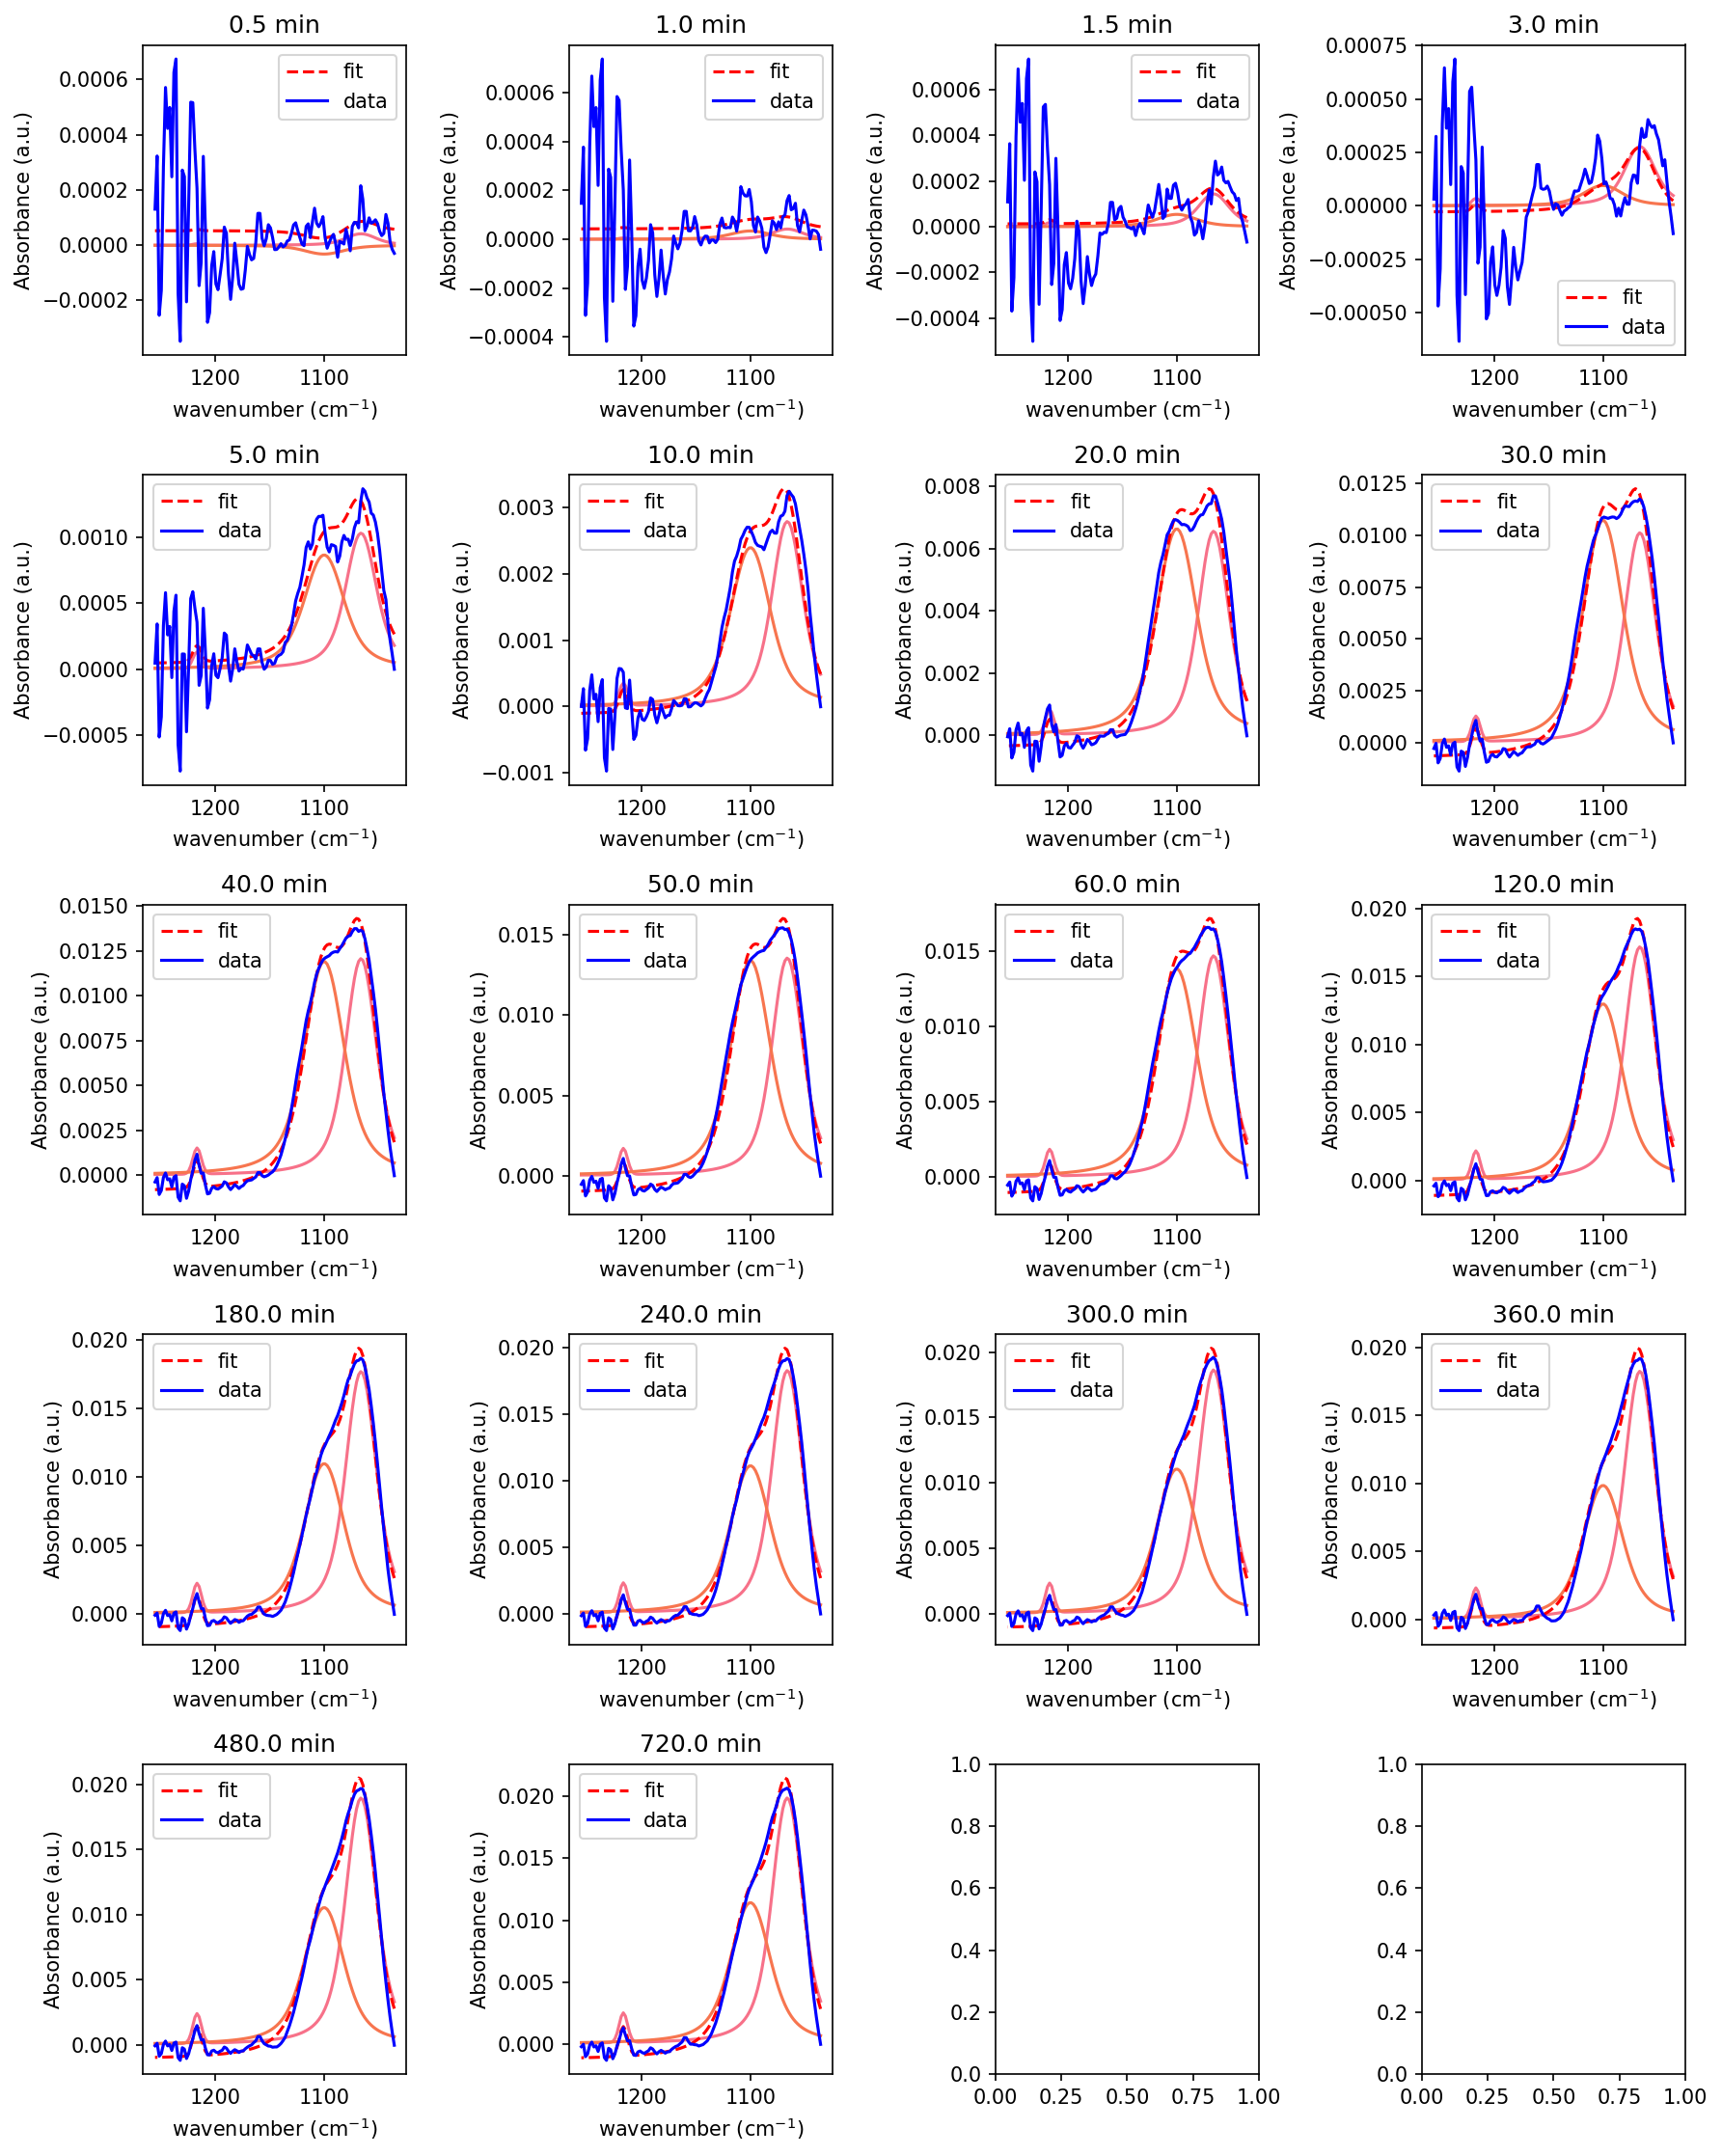

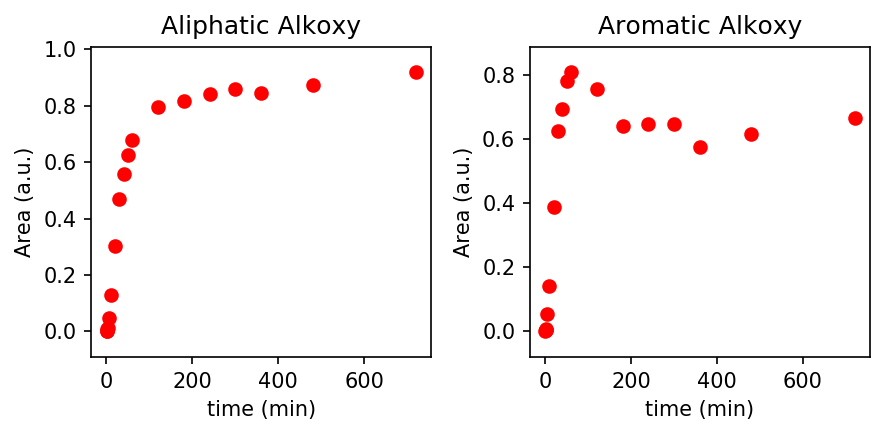

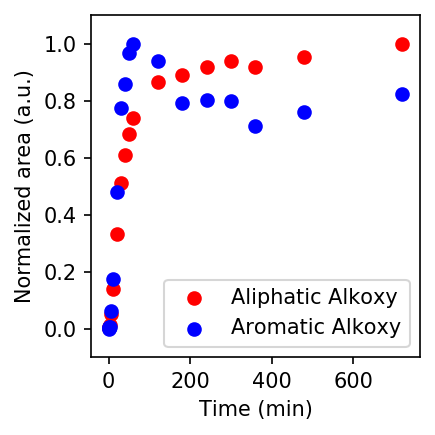

In [92]:
new_params_CO = result.params
Vec_name_CO = ['Aliphatic Alkoxy','Aromatic Alkoxy']
yhat_CO = Generate_data(new_params_CO,x_CO,Vec_fit_CO,ndata=18)
print('The R2 score of the fit is: {:.2f}'.format( r2_score(y_CO.flatten(), yhat_CO.flatten())))
Plot_data(new_params_CO,x_CO,y_CO,Vec_fit_CO,Time,Vec_name_CO,False)

In [93]:
Print_var(new_params_CO,np.array(['Aliphatic Alkoxy','Aromatic Alkoxy']),Vec_IG_struc_CO)

Species		Type		Peak (cm-1)	Variance (cm-1)	
Aliphatic Alkoxy	Gaussian	1216.8		3.8
		Voigt		1066.2		9.4
Aromatic Alkoxy	Voigt		1100.1		12.2
